In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
from sklearn.preprocessing import StandardScaler, Imputer, FunctionTransformer, LabelBinarizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils


/Users/cysung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
files = [f for f in listdir('./') if '.csv' in f]
files

['test_df_block13_open26.csv',
 'test_df_block13_open52.csv',
 'test_df_block13_open78.csv',
 'test_df_block26_open26.csv',
 'test_df_block26_open52.csv',
 'test_df_block26_open78.csv',
 'test_df_block52_open26.csv',
 'test_df_block52_open52.csv',
 'test_df_block52_open78.csv',
 'train_df_block13_open26.csv',
 'train_df_block13_open52.csv',
 'train_df_block13_open78.csv',
 'train_df_block26_open26.csv',
 'train_df_block26_open52.csv',
 'train_df_block26_open78.csv',
 'train_df_block52_open26.csv',
 'train_df_block52_open52.csv',
 'train_df_block52_open78.csv']

# Build 9 models for different combination of block weeks = [13, 26, 52] and open weeks = [26, 52, 78] with voting classifier

In [5]:
file = open("results.txt", "w+")
file.close()

block = ['13'] #, '26', '52']
openw = ['26'] #, '52', '78']
for b in block:
    for o in openw:
        train = './train_df_block'+b+'_open'+o+'.csv'
        test = './test_df_block'+b+'_open'+o+'.csv'
        print(train, test)
        df_train = pd.read_csv(train)
        df_test = pd.read_csv(test)
        unwanted = ['id', 'name', 'first_review', 'last_review', 'permanently_closed']
        wanted = [i for i in df_train.columns if i not in unwanted]
        X_train = df_train[wanted]
        X_test = df_test[wanted]
        ytrain = df_train['permanently_closed']
        ytest = df_test['permanently_closed']
        imputer = Imputer(missing_values=np.nan, strategy='mean', axis=1)
        ss = StandardScaler() 
        pipe = make_pipeline(imputer, ss) 
        Xtrain = pipe.fit_transform(X_train)
        Xtest = pipe.transform(X_test)

#         list_of_classifiers = [
#             ('logreg', LogisticRegression()),
#         #     ('sgd_cls', SGDClassifier()),
#         #     ('dt', DecisionTreeClassifier()),
#             ('rf', RandomForestClassifier()),
#             ('gb', GradientBoostingClassifier())
#         ]
#         vclf = VotingClassifier(list_of_classifiers, voting='soft')
#         params = {
#             'logreg__C': [0.1, 1.0, 10.0],
#             'logreg__penalty': ['l1', 'l2'],
#         #     'sgd_cls__loss':['log'], #, 'squared_loss'],
#         #     'sgd_cls__penalty':['elasticnet'],
#         #     'sgd_cls__alpha':np.logspace(-1,1,5),
#         #     'sgd_cls__l1_ratio':[i/10.0 for i in range(6)],
#             #'dt__max_depth': [3, 5, 7, 9],
#             'rf__max_depth': [5, 7],
#             'rf__n_estimators': [100, 500],
#             'gb__max_depth': [5, 7],
#             'gb__n_estimators': [100, 500],
#         }
#         gs = GridSearchCV(vclf, params, verbose=2)    
#         gs.fit(Xtrain, ytrain)
#         with open("results.txt","a+") as file:
#             file.write(train+'\t'+test+'\n')            
#             file.write('score: '+str(gs.score(Xtest, ytest))+'\n')            
#             file.write('best parameters:'+'\n')
#             file.write(str(gs.best_params_))
#             file.write('\n')

./train_df_block13_open26.csv ./test_df_block13_open26.csv


In [10]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((864, 223), (864,), (288, 223), (288,))

In [12]:
model = Sequential()
model.add(Dense(10, input_dim=223, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                2240      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 2,361
Trainable params: 2,361
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )
n_epochs=5000
history = model.fit(Xtrain, 
          ytrain, 
          epochs=n_epochs,
          verbose=1,
          batch_size=128,
          shuffle=True,
          validation_split=0.25)

Train on 648 samples, validate on 216 samples
Epoch 1/5000
648/648 [==============================] - 0s - loss: 0.8293 - acc: 0.4506 - val_loss: 0.7865 - val_acc: 0.3843
Epoch 2/5000
648/648 [==============================] - 0s - loss: 0.8274 - acc: 0.4537 - val_loss: 0.7623 - val_acc: 0.3796
Epoch 3/5000
648/648 [==============================] - 0s - loss: 0.7442 - acc: 0.5170 - val_loss: 0.7408 - val_acc: 0.4306
Epoch 4/5000
648/648 [==============================] - 0s - loss: 0.6882 - acc: 0.5664 - val_loss: 0.7217 - val_acc: 0.4398
Epoch 5/5000
648/648 [==============================] - 0s - loss: 0.6871 - acc: 0.5540 - val_loss: 0.7055 - val_acc: 0.4861
Epoch 6/5000
648/648 [==============================] - 0s - loss: 0.6926 - acc: 0.5648 - val_loss: 0.6913 - val_acc: 0.5185
Epoch 7/5000
648/648 [==============================] - 0s - loss: 0.6952 - acc: 0.5880 - val_loss: 0.6784 - val_acc: 0.5694
Epoch 8/5000
648/648 [==============================] - 0s - loss: 0.6685 - acc

648/648 [==============================] - 0s - loss: 0.3941 - acc: 0.7855 - val_loss: 0.5207 - val_acc: 0.8056
Epoch 66/5000
648/648 [==============================] - 0s - loss: 0.3905 - acc: 0.7948 - val_loss: 0.5208 - val_acc: 0.8056
Epoch 67/5000
648/648 [==============================] - 0s - loss: 0.3934 - acc: 0.8056 - val_loss: 0.5204 - val_acc: 0.8009
Epoch 68/5000
648/648 [==============================] - 0s - loss: 0.3731 - acc: 0.8164 - val_loss: 0.5205 - val_acc: 0.8009
Epoch 69/5000
648/648 [==============================] - 0s - loss: 0.3838 - acc: 0.7917 - val_loss: 0.5204 - val_acc: 0.7963
Epoch 70/5000
648/648 [==============================] - 0s - loss: 0.3823 - acc: 0.7978 - val_loss: 0.5206 - val_acc: 0.7917
Epoch 71/5000
648/648 [==============================] - 0s - loss: 0.3866 - acc: 0.7870 - val_loss: 0.5211 - val_acc: 0.7917
Epoch 72/5000
648/648 [==============================] - 0s - loss: 0.3767 - acc: 0.8133 - val_loss: 0.5221 - val_acc: 0.7917
Epoch 

648/648 [==============================] - 0s - loss: 0.2368 - acc: 0.8997 - val_loss: 0.7367 - val_acc: 0.7778
Epoch 130/5000
648/648 [==============================] - 0s - loss: 0.2345 - acc: 0.8843 - val_loss: 0.7431 - val_acc: 0.7778
Epoch 131/5000
648/648 [==============================] - 0s - loss: 0.2405 - acc: 0.8750 - val_loss: 0.7505 - val_acc: 0.7824
Epoch 132/5000
648/648 [==============================] - 0s - loss: 0.2389 - acc: 0.9043 - val_loss: 0.7573 - val_acc: 0.7824
Epoch 133/5000
648/648 [==============================] - 0s - loss: 0.2324 - acc: 0.8889 - val_loss: 0.7642 - val_acc: 0.7778
Epoch 134/5000
648/648 [==============================] - 0s - loss: 0.2249 - acc: 0.8966 - val_loss: 0.7708 - val_acc: 0.7731
Epoch 135/5000
648/648 [==============================] - 0s - loss: 0.2553 - acc: 0.8889 - val_loss: 0.7743 - val_acc: 0.7778
Epoch 136/5000
648/648 [==============================] - 0s - loss: 0.2371 - acc: 0.9028 - val_loss: 0.7792 - val_acc: 0.7824

648/648 [==============================] - 0s - loss: 0.1948 - acc: 0.9136 - val_loss: 1.1682 - val_acc: 0.7639
Epoch 194/5000
648/648 [==============================] - 0s - loss: 0.1714 - acc: 0.9336 - val_loss: 1.1758 - val_acc: 0.7639
Epoch 195/5000
648/648 [==============================] - 0s - loss: 0.1689 - acc: 0.9290 - val_loss: 1.1843 - val_acc: 0.7639
Epoch 196/5000
648/648 [==============================] - 0s - loss: 0.1801 - acc: 0.9120 - val_loss: 1.1917 - val_acc: 0.7639
Epoch 197/5000
648/648 [==============================] - 0s - loss: 0.1812 - acc: 0.9244 - val_loss: 1.1971 - val_acc: 0.7639
Epoch 198/5000
648/648 [==============================] - 0s - loss: 0.1704 - acc: 0.9228 - val_loss: 1.2017 - val_acc: 0.7685
Epoch 199/5000
648/648 [==============================] - 0s - loss: 0.1652 - acc: 0.9367 - val_loss: 1.2076 - val_acc: 0.7639
Epoch 200/5000
648/648 [==============================] - 0s - loss: 0.1712 - acc: 0.9290 - val_loss: 1.2169 - val_acc: 0.7593

648/648 [==============================] - 0s - loss: 0.1222 - acc: 0.9475 - val_loss: 1.5259 - val_acc: 0.7593
Epoch 258/5000
648/648 [==============================] - 0s - loss: 0.1291 - acc: 0.9475 - val_loss: 1.5291 - val_acc: 0.7593
Epoch 259/5000
648/648 [==============================] - 0s - loss: 0.1511 - acc: 0.9321 - val_loss: 1.5341 - val_acc: 0.7593
Epoch 260/5000
648/648 [==============================] - 0s - loss: 0.1503 - acc: 0.9429 - val_loss: 1.5380 - val_acc: 0.7639
Epoch 261/5000
648/648 [==============================] - 0s - loss: 0.1350 - acc: 0.9398 - val_loss: 1.5437 - val_acc: 0.7639
Epoch 262/5000
648/648 [==============================] - 0s - loss: 0.1347 - acc: 0.9367 - val_loss: 1.5491 - val_acc: 0.7639
Epoch 263/5000
648/648 [==============================] - 0s - loss: 0.1514 - acc: 0.9306 - val_loss: 1.5575 - val_acc: 0.7639
Epoch 264/5000
648/648 [==============================] - 0s - loss: 0.1331 - acc: 0.9460 - val_loss: 1.5620 - val_acc: 0.7593

648/648 [==============================] - 0s - loss: 0.1064 - acc: 0.9552 - val_loss: 1.7624 - val_acc: 0.7593
Epoch 322/5000
648/648 [==============================] - 0s - loss: 0.0983 - acc: 0.9583 - val_loss: 1.7687 - val_acc: 0.7546
Epoch 323/5000
648/648 [==============================] - 0s - loss: 0.1008 - acc: 0.9645 - val_loss: 1.7732 - val_acc: 0.7546
Epoch 324/5000
648/648 [==============================] - 0s - loss: 0.1153 - acc: 0.9599 - val_loss: 1.7751 - val_acc: 0.7546
Epoch 325/5000
648/648 [==============================] - 0s - loss: 0.1233 - acc: 0.9475 - val_loss: 1.7771 - val_acc: 0.7546
Epoch 326/5000
648/648 [==============================] - 0s - loss: 0.0956 - acc: 0.9630 - val_loss: 1.7808 - val_acc: 0.7593
Epoch 327/5000
648/648 [==============================] - 0s - loss: 0.1128 - acc: 0.9583 - val_loss: 1.7862 - val_acc: 0.7593
Epoch 328/5000
648/648 [==============================] - 0s - loss: 0.1101 - acc: 0.9475 - val_loss: 1.7915 - val_acc: 0.7593

648/648 [==============================] - 0s - loss: 0.0923 - acc: 0.9660 - val_loss: 1.9600 - val_acc: 0.7593
Epoch 386/5000
648/648 [==============================] - 0s - loss: 0.0946 - acc: 0.9660 - val_loss: 1.9665 - val_acc: 0.7593
Epoch 387/5000
648/648 [==============================] - 0s - loss: 0.0879 - acc: 0.9707 - val_loss: 1.9701 - val_acc: 0.7593
Epoch 388/5000
648/648 [==============================] - 0s - loss: 0.0961 - acc: 0.9614 - val_loss: 1.9732 - val_acc: 0.7593
Epoch 389/5000
648/648 [==============================] - 0s - loss: 0.0877 - acc: 0.9676 - val_loss: 1.9751 - val_acc: 0.7593
Epoch 390/5000
648/648 [==============================] - 0s - loss: 0.0743 - acc: 0.9753 - val_loss: 1.9767 - val_acc: 0.7593
Epoch 391/5000
648/648 [==============================] - 0s - loss: 0.0836 - acc: 0.9583 - val_loss: 1.9761 - val_acc: 0.7593
Epoch 392/5000
648/648 [==============================] - 0s - loss: 0.0794 - acc: 0.9660 - val_loss: 1.9781 - val_acc: 0.7593

648/648 [==============================] - 0s - loss: 0.0770 - acc: 0.9707 - val_loss: 2.1622 - val_acc: 0.7546
Epoch 450/5000
648/648 [==============================] - 0s - loss: 0.0691 - acc: 0.9753 - val_loss: 2.1614 - val_acc: 0.7500
Epoch 451/5000
648/648 [==============================] - 0s - loss: 0.0574 - acc: 0.9753 - val_loss: 2.1623 - val_acc: 0.7500
Epoch 452/5000
648/648 [==============================] - 0s - loss: 0.0735 - acc: 0.9707 - val_loss: 2.1633 - val_acc: 0.7500
Epoch 453/5000
648/648 [==============================] - 0s - loss: 0.0811 - acc: 0.9691 - val_loss: 2.1631 - val_acc: 0.7500
Epoch 454/5000
648/648 [==============================] - 0s - loss: 0.0606 - acc: 0.9784 - val_loss: 2.1600 - val_acc: 0.7500
Epoch 455/5000
648/648 [==============================] - 0s - loss: 0.0675 - acc: 0.9722 - val_loss: 2.1586 - val_acc: 0.7500
Epoch 456/5000
648/648 [==============================] - 0s - loss: 0.0680 - acc: 0.9691 - val_loss: 2.1614 - val_acc: 0.7500

648/648 [==============================] - 0s - loss: 0.0591 - acc: 0.9815 - val_loss: 2.2054 - val_acc: 0.7593
Epoch 514/5000
648/648 [==============================] - 0s - loss: 0.0772 - acc: 0.9691 - val_loss: 2.2094 - val_acc: 0.7593
Epoch 515/5000
648/648 [==============================] - 0s - loss: 0.0735 - acc: 0.9583 - val_loss: 2.2136 - val_acc: 0.7639
Epoch 516/5000
648/648 [==============================] - 0s - loss: 0.0704 - acc: 0.9691 - val_loss: 2.2170 - val_acc: 0.7639
Epoch 517/5000
648/648 [==============================] - 0s - loss: 0.0680 - acc: 0.9676 - val_loss: 2.2184 - val_acc: 0.7593
Epoch 518/5000
648/648 [==============================] - 0s - loss: 0.0648 - acc: 0.9707 - val_loss: 2.2209 - val_acc: 0.7593
Epoch 519/5000
648/648 [==============================] - 0s - loss: 0.0594 - acc: 0.9769 - val_loss: 2.2242 - val_acc: 0.7593
Epoch 520/5000
648/648 [==============================] - 0s - loss: 0.0534 - acc: 0.9753 - val_loss: 2.2290 - val_acc: 0.7593

648/648 [==============================] - 0s - loss: 0.0483 - acc: 0.9799 - val_loss: 2.3225 - val_acc: 0.7685
Epoch 578/5000
648/648 [==============================] - 0s - loss: 0.0609 - acc: 0.9676 - val_loss: 2.3284 - val_acc: 0.7639
Epoch 579/5000
648/648 [==============================] - 0s - loss: 0.0441 - acc: 0.9830 - val_loss: 2.3320 - val_acc: 0.7685
Epoch 580/5000
648/648 [==============================] - 0s - loss: 0.0440 - acc: 0.9846 - val_loss: 2.3356 - val_acc: 0.7685
Epoch 581/5000
648/648 [==============================] - 0s - loss: 0.0620 - acc: 0.9691 - val_loss: 2.3366 - val_acc: 0.7685
Epoch 582/5000
648/648 [==============================] - 0s - loss: 0.0564 - acc: 0.9769 - val_loss: 2.3346 - val_acc: 0.7685
Epoch 583/5000
648/648 [==============================] - 0s - loss: 0.0449 - acc: 0.9861 - val_loss: 2.3341 - val_acc: 0.7685
Epoch 584/5000
648/648 [==============================] - 0s - loss: 0.0532 - acc: 0.9769 - val_loss: 2.3355 - val_acc: 0.7685

648/648 [==============================] - 0s - loss: 0.0654 - acc: 0.9645 - val_loss: 2.4211 - val_acc: 0.7593
Epoch 642/5000
648/648 [==============================] - 0s - loss: 0.0484 - acc: 0.9769 - val_loss: 2.4201 - val_acc: 0.7593
Epoch 643/5000
648/648 [==============================] - 0s - loss: 0.0460 - acc: 0.9815 - val_loss: 2.4212 - val_acc: 0.7593
Epoch 644/5000
648/648 [==============================] - 0s - loss: 0.0479 - acc: 0.9722 - val_loss: 2.4201 - val_acc: 0.7593
Epoch 645/5000
648/648 [==============================] - 0s - loss: 0.0568 - acc: 0.9691 - val_loss: 2.4207 - val_acc: 0.7593
Epoch 646/5000
648/648 [==============================] - 0s - loss: 0.0485 - acc: 0.9753 - val_loss: 2.4237 - val_acc: 0.7593
Epoch 647/5000
648/648 [==============================] - 0s - loss: 0.0540 - acc: 0.9753 - val_loss: 2.4282 - val_acc: 0.7639
Epoch 648/5000
648/648 [==============================] - 0s - loss: 0.0546 - acc: 0.9645 - val_loss: 2.4279 - val_acc: 0.7639

648/648 [==============================] - 0s - loss: 0.0468 - acc: 0.9722 - val_loss: 2.5528 - val_acc: 0.7593
Epoch 706/5000
648/648 [==============================] - 0s - loss: 0.0494 - acc: 0.9784 - val_loss: 2.5535 - val_acc: 0.7593
Epoch 707/5000
648/648 [==============================] - 0s - loss: 0.0481 - acc: 0.9738 - val_loss: 2.5524 - val_acc: 0.7593
Epoch 708/5000
648/648 [==============================] - 0s - loss: 0.0373 - acc: 0.9784 - val_loss: 2.5548 - val_acc: 0.7593
Epoch 709/5000
648/648 [==============================] - 0s - loss: 0.0650 - acc: 0.9753 - val_loss: 2.5607 - val_acc: 0.7593
Epoch 710/5000
648/648 [==============================] - 0s - loss: 0.0385 - acc: 0.9815 - val_loss: 2.5654 - val_acc: 0.7639
Epoch 711/5000
648/648 [==============================] - 0s - loss: 0.0425 - acc: 0.9830 - val_loss: 2.5667 - val_acc: 0.7639
Epoch 712/5000
648/648 [==============================] - 0s - loss: 0.0339 - acc: 0.9784 - val_loss: 2.5700 - val_acc: 0.7639

648/648 [==============================] - 0s - loss: 0.0404 - acc: 0.9846 - val_loss: 2.6498 - val_acc: 0.7639
Epoch 770/5000
648/648 [==============================] - 0s - loss: 0.0495 - acc: 0.9769 - val_loss: 2.6446 - val_acc: 0.7639
Epoch 771/5000
648/648 [==============================] - 0s - loss: 0.0471 - acc: 0.9722 - val_loss: 2.6416 - val_acc: 0.7639
Epoch 772/5000
648/648 [==============================] - 0s - loss: 0.0361 - acc: 0.9784 - val_loss: 2.6419 - val_acc: 0.7593
Epoch 773/5000
648/648 [==============================] - 0s - loss: 0.0371 - acc: 0.9815 - val_loss: 2.6444 - val_acc: 0.7593
Epoch 774/5000
648/648 [==============================] - 0s - loss: 0.0646 - acc: 0.9753 - val_loss: 2.6413 - val_acc: 0.7593
Epoch 775/5000
648/648 [==============================] - 0s - loss: 0.0363 - acc: 0.9815 - val_loss: 2.6346 - val_acc: 0.7593
Epoch 776/5000
648/648 [==============================] - 0s - loss: 0.0596 - acc: 0.9769 - val_loss: 2.6299 - val_acc: 0.7593

648/648 [==============================] - 0s - loss: 0.0398 - acc: 0.9799 - val_loss: 2.8024 - val_acc: 0.7546
Epoch 834/5000
648/648 [==============================] - 0s - loss: 0.0465 - acc: 0.9769 - val_loss: 2.8041 - val_acc: 0.7546
Epoch 835/5000
648/648 [==============================] - 0s - loss: 0.0420 - acc: 0.9815 - val_loss: 2.8046 - val_acc: 0.7546
Epoch 836/5000
648/648 [==============================] - 0s - loss: 0.0406 - acc: 0.9722 - val_loss: 2.8068 - val_acc: 0.7546
Epoch 837/5000
648/648 [==============================] - 0s - loss: 0.0479 - acc: 0.9738 - val_loss: 2.8109 - val_acc: 0.7546
Epoch 838/5000
648/648 [==============================] - 0s - loss: 0.0483 - acc: 0.9815 - val_loss: 2.8151 - val_acc: 0.7546
Epoch 839/5000
648/648 [==============================] - 0s - loss: 0.0387 - acc: 0.9799 - val_loss: 2.8181 - val_acc: 0.7593
Epoch 840/5000
648/648 [==============================] - ETA: 0s - loss: 0.0540 - acc: 0.976 - 0s - loss: 0.0339 - acc: 0.984

648/648 [==============================] - 0s - loss: 0.0464 - acc: 0.9861 - val_loss: 2.8909 - val_acc: 0.7639
Epoch 898/5000
648/648 [==============================] - 0s - loss: 0.0322 - acc: 0.9892 - val_loss: 2.8831 - val_acc: 0.7639
Epoch 899/5000
648/648 [==============================] - 0s - loss: 0.0352 - acc: 0.9753 - val_loss: 2.8785 - val_acc: 0.7639
Epoch 900/5000
648/648 [==============================] - 0s - loss: 0.0351 - acc: 0.9784 - val_loss: 2.8771 - val_acc: 0.7639
Epoch 901/5000
648/648 [==============================] - 0s - loss: 0.0336 - acc: 0.9769 - val_loss: 2.8807 - val_acc: 0.7639
Epoch 902/5000
648/648 [==============================] - 0s - loss: 0.0390 - acc: 0.9784 - val_loss: 2.8846 - val_acc: 0.7593
Epoch 903/5000
648/648 [==============================] - 0s - loss: 0.0376 - acc: 0.9784 - val_loss: 2.8902 - val_acc: 0.7593
Epoch 904/5000
648/648 [==============================] - 0s - loss: 0.0354 - acc: 0.9769 - val_loss: 2.8956 - val_acc: 0.7639

648/648 [==============================] - 0s - loss: 0.0417 - acc: 0.9799 - val_loss: 2.9082 - val_acc: 0.7593
Epoch 962/5000
648/648 [==============================] - 0s - loss: 0.0440 - acc: 0.9846 - val_loss: 2.9137 - val_acc: 0.7593
Epoch 963/5000
648/648 [==============================] - 0s - loss: 0.0568 - acc: 0.9769 - val_loss: 2.9101 - val_acc: 0.7593
Epoch 964/5000
648/648 [==============================] - 0s - loss: 0.0479 - acc: 0.9799 - val_loss: 2.9108 - val_acc: 0.7593
Epoch 965/5000
648/648 [==============================] - 0s - loss: 0.0330 - acc: 0.9830 - val_loss: 2.9091 - val_acc: 0.7593
Epoch 966/5000
648/648 [==============================] - 0s - loss: 0.0383 - acc: 0.9722 - val_loss: 2.9048 - val_acc: 0.7593
Epoch 967/5000
648/648 [==============================] - 0s - loss: 0.0397 - acc: 0.9830 - val_loss: 2.9032 - val_acc: 0.7593
Epoch 968/5000
648/648 [==============================] - 0s - loss: 0.0523 - acc: 0.9676 - val_loss: 2.8993 - val_acc: 0.7593

648/648 [==============================] - 0s - loss: 0.0308 - acc: 0.9846 - val_loss: 2.9687 - val_acc: 0.7639
Epoch 1026/5000
648/648 [==============================] - 0s - loss: 0.0299 - acc: 0.9799 - val_loss: 2.9716 - val_acc: 0.7639
Epoch 1027/5000
648/648 [==============================] - 0s - loss: 0.0373 - acc: 0.9769 - val_loss: 2.9758 - val_acc: 0.7639
Epoch 1028/5000
648/648 [==============================] - 0s - loss: 0.0313 - acc: 0.9861 - val_loss: 2.9781 - val_acc: 0.7639
Epoch 1029/5000
648/648 [==============================] - 0s - loss: 0.0316 - acc: 0.9830 - val_loss: 2.9815 - val_acc: 0.7639
Epoch 1030/5000
648/648 [==============================] - 0s - loss: 0.0265 - acc: 0.9861 - val_loss: 2.9842 - val_acc: 0.7639
Epoch 1031/5000
648/648 [==============================] - 0s - loss: 0.0554 - acc: 0.9738 - val_loss: 2.9879 - val_acc: 0.7639
Epoch 1032/5000
648/648 [==============================] - 0s - loss: 0.0399 - acc: 0.9784 - val_loss: 2.9903 - val_acc:

648/648 [==============================] - 0s - loss: 0.0360 - acc: 0.9769 - val_loss: 2.9882 - val_acc: 0.7685
Epoch 1090/5000
648/648 [==============================] - 0s - loss: 0.0357 - acc: 0.9799 - val_loss: 2.9909 - val_acc: 0.7685
Epoch 1091/5000
648/648 [==============================] - 0s - loss: 0.0495 - acc: 0.9722 - val_loss: 2.9898 - val_acc: 0.7685
Epoch 1092/5000
648/648 [==============================] - 0s - loss: 0.0264 - acc: 0.9861 - val_loss: 2.9868 - val_acc: 0.7685
Epoch 1093/5000
648/648 [==============================] - 0s - loss: 0.0274 - acc: 0.9861 - val_loss: 2.9857 - val_acc: 0.7685
Epoch 1094/5000
648/648 [==============================] - 0s - loss: 0.0357 - acc: 0.9753 - val_loss: 2.9857 - val_acc: 0.7685
Epoch 1095/5000
648/648 [==============================] - 0s - loss: 0.0508 - acc: 0.9769 - val_loss: 2.9827 - val_acc: 0.7685
Epoch 1096/5000
648/648 [==============================] - 0s - loss: 0.0323 - acc: 0.9830 - val_loss: 2.9812 - val_acc:

648/648 [==============================] - 0s - loss: 0.0303 - acc: 0.9892 - val_loss: 2.9589 - val_acc: 0.7685
Epoch 1153/5000
648/648 [==============================] - 0s - loss: 0.0297 - acc: 0.9846 - val_loss: 2.9618 - val_acc: 0.7685
Epoch 1154/5000
648/648 [==============================] - 0s - loss: 0.0344 - acc: 0.9799 - val_loss: 2.9551 - val_acc: 0.7685
Epoch 1155/5000
648/648 [==============================] - 0s - loss: 0.0393 - acc: 0.9815 - val_loss: 2.9554 - val_acc: 0.7685
Epoch 1156/5000
648/648 [==============================] - 0s - loss: 0.0385 - acc: 0.9815 - val_loss: 2.9593 - val_acc: 0.7685
Epoch 1157/5000
648/648 [==============================] - 0s - loss: 0.0419 - acc: 0.9769 - val_loss: 2.9715 - val_acc: 0.7639
Epoch 1158/5000
648/648 [==============================] - 0s - loss: 0.0315 - acc: 0.9861 - val_loss: 2.9782 - val_acc: 0.7639
Epoch 1159/5000
648/648 [==============================] - 0s - loss: 0.0324 - acc: 0.9861 - val_loss: 2.9889 - val_acc:

648/648 [==============================] - 0s - loss: 0.0224 - acc: 0.9892 - val_loss: 3.0782 - val_acc: 0.7593
Epoch 1217/5000
648/648 [==============================] - 0s - loss: 0.0242 - acc: 0.9892 - val_loss: 3.0782 - val_acc: 0.7593
Epoch 1218/5000
648/648 [==============================] - 0s - loss: 0.0356 - acc: 0.9830 - val_loss: 3.0762 - val_acc: 0.7593
Epoch 1219/5000
648/648 [==============================] - 0s - loss: 0.0278 - acc: 0.9861 - val_loss: 3.0752 - val_acc: 0.7593
Epoch 1220/5000
648/648 [==============================] - 0s - loss: 0.0305 - acc: 0.9907 - val_loss: 3.0742 - val_acc: 0.7593
Epoch 1221/5000
648/648 [==============================] - ETA: 0s - loss: 0.0298 - acc: 0.992 - 0s - loss: 0.0320 - acc: 0.9861 - val_loss: 3.0740 - val_acc: 0.7593
Epoch 1222/5000
648/648 [==============================] - 0s - loss: 0.0262 - acc: 0.9923 - val_loss: 3.0751 - val_acc: 0.7593
Epoch 1223/5000
648/648 [==============================] - 0s - loss: 0.0448 - acc

648/648 [==============================] - 0s - loss: 0.0438 - acc: 0.9815 - val_loss: 3.1143 - val_acc: 0.7593
Epoch 1280/5000
648/648 [==============================] - 0s - loss: 0.0354 - acc: 0.9877 - val_loss: 3.1100 - val_acc: 0.7593
Epoch 1281/5000
648/648 [==============================] - 0s - loss: 0.0371 - acc: 0.9815 - val_loss: 3.1088 - val_acc: 0.7593
Epoch 1282/5000
648/648 [==============================] - 0s - loss: 0.0375 - acc: 0.9877 - val_loss: 3.1116 - val_acc: 0.7593
Epoch 1283/5000
648/648 [==============================] - 0s - loss: 0.0219 - acc: 0.9907 - val_loss: 3.1115 - val_acc: 0.7593
Epoch 1284/5000
648/648 [==============================] - 0s - loss: 0.0280 - acc: 0.9892 - val_loss: 3.1117 - val_acc: 0.7546
Epoch 1285/5000
648/648 [==============================] - 0s - loss: 0.0333 - acc: 0.9892 - val_loss: 3.1156 - val_acc: 0.7546
Epoch 1286/5000
648/648 [==============================] - 0s - loss: 0.0281 - acc: 0.9877 - val_loss: 3.1159 - val_acc:

648/648 [==============================] - 0s - loss: 0.0278 - acc: 0.9877 - val_loss: 3.1894 - val_acc: 0.7593
Epoch 1344/5000
648/648 [==============================] - 0s - loss: 0.0420 - acc: 0.9846 - val_loss: 3.1920 - val_acc: 0.7593
Epoch 1345/5000
648/648 [==============================] - 0s - loss: 0.0285 - acc: 0.9861 - val_loss: 3.1915 - val_acc: 0.7593
Epoch 1346/5000
648/648 [==============================] - 0s - loss: 0.0364 - acc: 0.9861 - val_loss: 3.1935 - val_acc: 0.7593
Epoch 1347/5000
648/648 [==============================] - 0s - loss: 0.0352 - acc: 0.9846 - val_loss: 3.1946 - val_acc: 0.7593
Epoch 1348/5000
648/648 [==============================] - 0s - loss: 0.0365 - acc: 0.9799 - val_loss: 3.1955 - val_acc: 0.7639
Epoch 1349/5000
648/648 [==============================] - 0s - loss: 0.0292 - acc: 0.9830 - val_loss: 3.1978 - val_acc: 0.7639
Epoch 1350/5000
648/648 [==============================] - 0s - loss: 0.0404 - acc: 0.9846 - val_loss: 3.1992 - val_acc:

648/648 [==============================] - 0s - loss: 0.0260 - acc: 0.9830 - val_loss: 3.2306 - val_acc: 0.7685
Epoch 1407/5000
648/648 [==============================] - 0s - loss: 0.0358 - acc: 0.9846 - val_loss: 3.2293 - val_acc: 0.7685
Epoch 1408/5000
648/648 [==============================] - 0s - loss: 0.0332 - acc: 0.9815 - val_loss: 3.2290 - val_acc: 0.7685
Epoch 1409/5000
648/648 [==============================] - 0s - loss: 0.0321 - acc: 0.9923 - val_loss: 3.2297 - val_acc: 0.7685
Epoch 1410/5000
648/648 [==============================] - 0s - loss: 0.0331 - acc: 0.9892 - val_loss: 3.2331 - val_acc: 0.7685
Epoch 1411/5000
648/648 [==============================] - 0s - loss: 0.0249 - acc: 0.9923 - val_loss: 3.2337 - val_acc: 0.7685
Epoch 1412/5000
648/648 [==============================] - 0s - loss: 0.0319 - acc: 0.9830 - val_loss: 3.2290 - val_acc: 0.7685
Epoch 1413/5000
648/648 [==============================] - 0s - loss: 0.0376 - acc: 0.9861 - val_loss: 3.2236 - val_acc:

648/648 [==============================] - 0s - loss: 0.0361 - acc: 0.9830 - val_loss: 3.2719 - val_acc: 0.7685
Epoch 1471/5000
648/648 [==============================] - 0s - loss: 0.0226 - acc: 0.9815 - val_loss: 3.2724 - val_acc: 0.7685
Epoch 1472/5000
648/648 [==============================] - 0s - loss: 0.0286 - acc: 0.9815 - val_loss: 3.2716 - val_acc: 0.7685
Epoch 1473/5000
648/648 [==============================] - 0s - loss: 0.0253 - acc: 0.9907 - val_loss: 3.2700 - val_acc: 0.7685
Epoch 1474/5000
648/648 [==============================] - 0s - loss: 0.0353 - acc: 0.9923 - val_loss: 3.2692 - val_acc: 0.7685
Epoch 1475/5000
648/648 [==============================] - 0s - loss: 0.0372 - acc: 0.9892 - val_loss: 3.2657 - val_acc: 0.7685
Epoch 1476/5000
648/648 [==============================] - 0s - loss: 0.0173 - acc: 0.9954 - val_loss: 3.2625 - val_acc: 0.7685
Epoch 1477/5000
648/648 [==============================] - 0s - loss: 0.0334 - acc: 0.9877 - val_loss: 3.2568 - val_acc:

648/648 [==============================] - 0s - loss: 0.0373 - acc: 0.9907 - val_loss: 3.2763 - val_acc: 0.7685
Epoch 1534/5000
648/648 [==============================] - 0s - loss: 0.0284 - acc: 0.9877 - val_loss: 3.2903 - val_acc: 0.7685
Epoch 1535/5000
648/648 [==============================] - 0s - loss: 0.0244 - acc: 0.9892 - val_loss: 3.2944 - val_acc: 0.7685
Epoch 1536/5000
648/648 [==============================] - 0s - loss: 0.0286 - acc: 0.9877 - val_loss: 3.2965 - val_acc: 0.7685
Epoch 1537/5000
648/648 [==============================] - 0s - loss: 0.0277 - acc: 0.9846 - val_loss: 3.2947 - val_acc: 0.7685
Epoch 1538/5000
648/648 [==============================] - 0s - loss: 0.0218 - acc: 0.9877 - val_loss: 3.2932 - val_acc: 0.7685
Epoch 1539/5000
648/648 [==============================] - 0s - loss: 0.0396 - acc: 0.9846 - val_loss: 3.2911 - val_acc: 0.7685
Epoch 1540/5000
648/648 [==============================] - 0s - loss: 0.0314 - acc: 0.9815 - val_loss: 3.2892 - val_acc:

648/648 [==============================] - 0s - loss: 0.0381 - acc: 0.9846 - val_loss: 3.2947 - val_acc: 0.7639
Epoch 1598/5000
648/648 [==============================] - 0s - loss: 0.0281 - acc: 0.9861 - val_loss: 3.2944 - val_acc: 0.7639
Epoch 1599/5000
648/648 [==============================] - 0s - loss: 0.0146 - acc: 0.9954 - val_loss: 3.2917 - val_acc: 0.7639
Epoch 1600/5000
648/648 [==============================] - 0s - loss: 0.0268 - acc: 0.9861 - val_loss: 3.2888 - val_acc: 0.7639
Epoch 1601/5000
648/648 [==============================] - 0s - loss: 0.0252 - acc: 0.9846 - val_loss: 3.2986 - val_acc: 0.7639
Epoch 1602/5000
648/648 [==============================] - 0s - loss: 0.0262 - acc: 0.9846 - val_loss: 3.3024 - val_acc: 0.7639
Epoch 1603/5000
648/648 [==============================] - 0s - loss: 0.0317 - acc: 0.9877 - val_loss: 3.3057 - val_acc: 0.7639
Epoch 1604/5000
648/648 [==============================] - 0s - loss: 0.0226 - acc: 0.9877 - val_loss: 3.3092 - val_acc:

648/648 [==============================] - 0s - loss: 0.0406 - acc: 0.9846 - val_loss: 3.2616 - val_acc: 0.7639
Epoch 1661/5000
648/648 [==============================] - 0s - loss: 0.0262 - acc: 0.9861 - val_loss: 3.2592 - val_acc: 0.7639
Epoch 1662/5000
648/648 [==============================] - 0s - loss: 0.0296 - acc: 0.9846 - val_loss: 3.2588 - val_acc: 0.7639
Epoch 1663/5000
648/648 [==============================] - 0s - loss: 0.0506 - acc: 0.9861 - val_loss: 3.2607 - val_acc: 0.7639
Epoch 1664/5000
648/648 [==============================] - 0s - loss: 0.0256 - acc: 0.9892 - val_loss: 3.2630 - val_acc: 0.7639
Epoch 1665/5000
648/648 [==============================] - 0s - loss: 0.0302 - acc: 0.9830 - val_loss: 3.2638 - val_acc: 0.7639
Epoch 1666/5000
648/648 [==============================] - 0s - loss: 0.0357 - acc: 0.9907 - val_loss: 3.2644 - val_acc: 0.7685
Epoch 1667/5000
648/648 [==============================] - 0s - loss: 0.0330 - acc: 0.9815 - val_loss: 3.2642 - val_acc:

648/648 [==============================] - 0s - loss: 0.0437 - acc: 0.9815 - val_loss: 3.2855 - val_acc: 0.7731
Epoch 1725/5000
648/648 [==============================] - 0s - loss: 0.0509 - acc: 0.9769 - val_loss: 3.2842 - val_acc: 0.7731
Epoch 1726/5000
648/648 [==============================] - 0s - loss: 0.0272 - acc: 0.9784 - val_loss: 3.2847 - val_acc: 0.7731
Epoch 1727/5000
648/648 [==============================] - 0s - loss: 0.0268 - acc: 0.9907 - val_loss: 3.2820 - val_acc: 0.7685
Epoch 1728/5000
648/648 [==============================] - 0s - loss: 0.0318 - acc: 0.9877 - val_loss: 3.2795 - val_acc: 0.7685
Epoch 1729/5000
648/648 [==============================] - 0s - loss: 0.0436 - acc: 0.9722 - val_loss: 3.2773 - val_acc: 0.7593
Epoch 1730/5000
648/648 [==============================] - 0s - loss: 0.0215 - acc: 0.9923 - val_loss: 3.2692 - val_acc: 0.7593
Epoch 1731/5000
648/648 [==============================] - 0s - loss: 0.0270 - acc: 0.9892 - val_loss: 3.2699 - val_acc:

648/648 [==============================] - 0s - loss: 0.0223 - acc: 0.9923 - val_loss: 3.2945 - val_acc: 0.7639
Epoch 1788/5000
648/648 [==============================] - 0s - loss: 0.0185 - acc: 0.9892 - val_loss: 3.2948 - val_acc: 0.7593
Epoch 1789/5000
648/648 [==============================] - 0s - loss: 0.0303 - acc: 0.9861 - val_loss: 3.2947 - val_acc: 0.7593
Epoch 1790/5000
648/648 [==============================] - 0s - loss: 0.0266 - acc: 0.9877 - val_loss: 3.2951 - val_acc: 0.7593
Epoch 1791/5000
648/648 [==============================] - 0s - loss: 0.0283 - acc: 0.9799 - val_loss: 3.2953 - val_acc: 0.7593
Epoch 1792/5000
648/648 [==============================] - 0s - loss: 0.0322 - acc: 0.9846 - val_loss: 3.2955 - val_acc: 0.7593
Epoch 1793/5000
648/648 [==============================] - 0s - loss: 0.0232 - acc: 0.9907 - val_loss: 3.2960 - val_acc: 0.7593
Epoch 1794/5000
648/648 [==============================] - 0s - loss: 0.0381 - acc: 0.9753 - val_loss: 3.2974 - val_acc:

648/648 [==============================] - 0s - loss: 0.0410 - acc: 0.9861 - val_loss: 3.3392 - val_acc: 0.7593
Epoch 1851/5000
648/648 [==============================] - 0s - loss: 0.0332 - acc: 0.9861 - val_loss: 3.3400 - val_acc: 0.7593
Epoch 1852/5000
648/648 [==============================] - 0s - loss: 0.0333 - acc: 0.9830 - val_loss: 3.3408 - val_acc: 0.7593
Epoch 1853/5000
648/648 [==============================] - 0s - loss: 0.0200 - acc: 0.9907 - val_loss: 3.3418 - val_acc: 0.7593
Epoch 1854/5000
648/648 [==============================] - 0s - loss: 0.0351 - acc: 0.9830 - val_loss: 3.3423 - val_acc: 0.7593
Epoch 1855/5000
648/648 [==============================] - 0s - loss: 0.0192 - acc: 0.9923 - val_loss: 3.3373 - val_acc: 0.7593
Epoch 1856/5000
648/648 [==============================] - 0s - loss: 0.0193 - acc: 0.9892 - val_loss: 3.3344 - val_acc: 0.7593
Epoch 1857/5000
648/648 [==============================] - 0s - loss: 0.0303 - acc: 0.9830 - val_loss: 3.3349 - val_acc:

648/648 [==============================] - 0s - loss: 0.0289 - acc: 0.9907 - val_loss: 3.2575 - val_acc: 0.7639
Epoch 1914/5000
648/648 [==============================] - 0s - loss: 0.0343 - acc: 0.9830 - val_loss: 3.2585 - val_acc: 0.7639
Epoch 1915/5000
648/648 [==============================] - 0s - loss: 0.0243 - acc: 0.9892 - val_loss: 3.2585 - val_acc: 0.7639
Epoch 1916/5000
648/648 [==============================] - 0s - loss: 0.0275 - acc: 0.9892 - val_loss: 3.2564 - val_acc: 0.7639
Epoch 1917/5000
648/648 [==============================] - 0s - loss: 0.0448 - acc: 0.9830 - val_loss: 3.2550 - val_acc: 0.7639
Epoch 1918/5000
648/648 [==============================] - 0s - loss: 0.0308 - acc: 0.9877 - val_loss: 3.2521 - val_acc: 0.7639
Epoch 1919/5000
648/648 [==============================] - 0s - loss: 0.0186 - acc: 0.9877 - val_loss: 3.2521 - val_acc: 0.7639
Epoch 1920/5000
648/648 [==============================] - 0s - loss: 0.0456 - acc: 0.9784 - val_loss: 3.2513 - val_acc:

648/648 [==============================] - 0s - loss: 0.0239 - acc: 0.9892 - val_loss: 3.2760 - val_acc: 0.7685
Epoch 1978/5000
648/648 [==============================] - 0s - loss: 0.0364 - acc: 0.9830 - val_loss: 3.2757 - val_acc: 0.7685
Epoch 1979/5000
648/648 [==============================] - 0s - loss: 0.0451 - acc: 0.9861 - val_loss: 3.2747 - val_acc: 0.7685
Epoch 1980/5000
648/648 [==============================] - 0s - loss: 0.0369 - acc: 0.9861 - val_loss: 3.2735 - val_acc: 0.7639
Epoch 1981/5000
648/648 [==============================] - 0s - loss: 0.0210 - acc: 0.9923 - val_loss: 3.2737 - val_acc: 0.7685
Epoch 1982/5000
648/648 [==============================] - 0s - loss: 0.0287 - acc: 0.9877 - val_loss: 3.2729 - val_acc: 0.7685
Epoch 1983/5000
648/648 [==============================] - 0s - loss: 0.0239 - acc: 0.9923 - val_loss: 3.2717 - val_acc: 0.7731
Epoch 1984/5000
648/648 [==============================] - 0s - loss: 0.0320 - acc: 0.9877 - val_loss: 3.2695 - val_acc:

648/648 [==============================] - 0s - loss: 0.0347 - acc: 0.9815 - val_loss: 3.2733 - val_acc: 0.7546
Epoch 2042/5000
648/648 [==============================] - 0s - loss: 0.0212 - acc: 0.9907 - val_loss: 3.2745 - val_acc: 0.7546
Epoch 2043/5000
648/648 [==============================] - 0s - loss: 0.0347 - acc: 0.9830 - val_loss: 3.2713 - val_acc: 0.7546
Epoch 2044/5000
648/648 [==============================] - 0s - loss: 0.0310 - acc: 0.9861 - val_loss: 3.2529 - val_acc: 0.7593
Epoch 2045/5000
648/648 [==============================] - 0s - loss: 0.0287 - acc: 0.9907 - val_loss: 3.2436 - val_acc: 0.7685
Epoch 2046/5000
648/648 [==============================] - 0s - loss: 0.0401 - acc: 0.9815 - val_loss: 3.2386 - val_acc: 0.7685
Epoch 2047/5000
648/648 [==============================] - 0s - loss: 0.0421 - acc: 0.9861 - val_loss: 3.2345 - val_acc: 0.7685
Epoch 2048/5000
648/648 [==============================] - 0s - loss: 0.0212 - acc: 0.9923 - val_loss: 3.2332 - val_acc:

648/648 [==============================] - 0s - loss: 0.0354 - acc: 0.9769 - val_loss: 3.1829 - val_acc: 0.7685
Epoch 2106/5000
648/648 [==============================] - 0s - loss: 0.0371 - acc: 0.9830 - val_loss: 3.1731 - val_acc: 0.7685
Epoch 2107/5000
648/648 [==============================] - 0s - loss: 0.0248 - acc: 0.9877 - val_loss: 3.1684 - val_acc: 0.7685
Epoch 2108/5000
648/648 [==============================] - 0s - loss: 0.0156 - acc: 0.9954 - val_loss: 3.1661 - val_acc: 0.7639
Epoch 2109/5000
648/648 [==============================] - 0s - loss: 0.0225 - acc: 0.9938 - val_loss: 3.1655 - val_acc: 0.7593
Epoch 2110/5000
648/648 [==============================] - 0s - loss: 0.0364 - acc: 0.9877 - val_loss: 3.1677 - val_acc: 0.7593
Epoch 2111/5000
648/648 [==============================] - 0s - loss: 0.0260 - acc: 0.9861 - val_loss: 3.1691 - val_acc: 0.7593
Epoch 2112/5000
648/648 [==============================] - 0s - loss: 0.0378 - acc: 0.9815 - val_loss: 3.1707 - val_acc:

648/648 [==============================] - 0s - loss: 0.0352 - acc: 0.9907 - val_loss: 3.0752 - val_acc: 0.7639
Epoch 2170/5000
648/648 [==============================] - 0s - loss: 0.0611 - acc: 0.9738 - val_loss: 3.0760 - val_acc: 0.7639
Epoch 2171/5000
648/648 [==============================] - 0s - loss: 0.0278 - acc: 0.9861 - val_loss: 3.0827 - val_acc: 0.7639
Epoch 2172/5000
648/648 [==============================] - 0s - loss: 0.0192 - acc: 0.9877 - val_loss: 3.0861 - val_acc: 0.7639
Epoch 2173/5000
648/648 [==============================] - 0s - loss: 0.0547 - acc: 0.9784 - val_loss: 3.0816 - val_acc: 0.7685
Epoch 2174/5000
648/648 [==============================] - 0s - loss: 0.0500 - acc: 0.9815 - val_loss: 3.0717 - val_acc: 0.7639
Epoch 2175/5000
648/648 [==============================] - 0s - loss: 0.0431 - acc: 0.9830 - val_loss: 3.0658 - val_acc: 0.7639
Epoch 2176/5000
648/648 [==============================] - 0s - loss: 0.0355 - acc: 0.9861 - val_loss: 3.0614 - val_acc:

648/648 [==============================] - 0s - loss: 0.0284 - acc: 0.9892 - val_loss: 3.0899 - val_acc: 0.7685
Epoch 2234/5000
648/648 [==============================] - 0s - loss: 0.0245 - acc: 0.9892 - val_loss: 3.0914 - val_acc: 0.7685
Epoch 2235/5000
648/648 [==============================] - 0s - loss: 0.0341 - acc: 0.9830 - val_loss: 3.0922 - val_acc: 0.7731
Epoch 2236/5000
648/648 [==============================] - 0s - loss: 0.0201 - acc: 0.9907 - val_loss: 3.0950 - val_acc: 0.7685
Epoch 2237/5000
648/648 [==============================] - 0s - loss: 0.0345 - acc: 0.9830 - val_loss: 3.0988 - val_acc: 0.7685
Epoch 2238/5000
648/648 [==============================] - 0s - loss: 0.0239 - acc: 0.9907 - val_loss: 3.1018 - val_acc: 0.7685
Epoch 2239/5000
648/648 [==============================] - 0s - loss: 0.0267 - acc: 0.9861 - val_loss: 3.1031 - val_acc: 0.7685
Epoch 2240/5000
648/648 [==============================] - 0s - loss: 0.0271 - acc: 0.9861 - val_loss: 3.1038 - val_acc:

648/648 [==============================] - 0s - loss: 0.0243 - acc: 0.9923 - val_loss: 3.1374 - val_acc: 0.7685
Epoch 2297/5000
648/648 [==============================] - 0s - loss: 0.0315 - acc: 0.9923 - val_loss: 3.1362 - val_acc: 0.7685
Epoch 2298/5000
648/648 [==============================] - 0s - loss: 0.0368 - acc: 0.9861 - val_loss: 3.1358 - val_acc: 0.7685
Epoch 2299/5000
648/648 [==============================] - 0s - loss: 0.0309 - acc: 0.9877 - val_loss: 3.1338 - val_acc: 0.7685
Epoch 2300/5000
648/648 [==============================] - 0s - loss: 0.0321 - acc: 0.9846 - val_loss: 3.1312 - val_acc: 0.7685
Epoch 2301/5000
648/648 [==============================] - 0s - loss: 0.0378 - acc: 0.9830 - val_loss: 3.1308 - val_acc: 0.7685
Epoch 2302/5000
648/648 [==============================] - 0s - loss: 0.0297 - acc: 0.9846 - val_loss: 3.1313 - val_acc: 0.7685
Epoch 2303/5000
648/648 [==============================] - 0s - loss: 0.0353 - acc: 0.9877 - val_loss: 3.1297 - val_acc:

648/648 [==============================] - 0s - loss: 0.0311 - acc: 0.9830 - val_loss: 3.1393 - val_acc: 0.7685
Epoch 2361/5000
648/648 [==============================] - 0s - loss: 0.0284 - acc: 0.9846 - val_loss: 3.1401 - val_acc: 0.7685
Epoch 2362/5000
648/648 [==============================] - 0s - loss: 0.0353 - acc: 0.9861 - val_loss: 3.1481 - val_acc: 0.7685
Epoch 2363/5000
648/648 [==============================] - 0s - loss: 0.0297 - acc: 0.9892 - val_loss: 3.1543 - val_acc: 0.7685
Epoch 2364/5000
648/648 [==============================] - 0s - loss: 0.0283 - acc: 0.9923 - val_loss: 3.1575 - val_acc: 0.7685
Epoch 2365/5000
648/648 [==============================] - 0s - loss: 0.0206 - acc: 0.9892 - val_loss: 3.1589 - val_acc: 0.7685
Epoch 2366/5000
648/648 [==============================] - 0s - loss: 0.0238 - acc: 0.9907 - val_loss: 3.1601 - val_acc: 0.7685
Epoch 2367/5000
648/648 [==============================] - 0s - loss: 0.0301 - acc: 0.9877 - val_loss: 3.1617 - val_acc:

648/648 [==============================] - 0s - loss: 0.0353 - acc: 0.9815 - val_loss: 3.1558 - val_acc: 0.7639
Epoch 2424/5000
648/648 [==============================] - 0s - loss: 0.0302 - acc: 0.9907 - val_loss: 3.1580 - val_acc: 0.7639
Epoch 2425/5000
648/648 [==============================] - 0s - loss: 0.0393 - acc: 0.9784 - val_loss: 3.1574 - val_acc: 0.7639
Epoch 2426/5000
648/648 [==============================] - 0s - loss: 0.0271 - acc: 0.9846 - val_loss: 3.1555 - val_acc: 0.7639
Epoch 2427/5000
648/648 [==============================] - 0s - loss: 0.0222 - acc: 0.9846 - val_loss: 3.1608 - val_acc: 0.7639
Epoch 2428/5000
648/648 [==============================] - 0s - loss: 0.0224 - acc: 0.9877 - val_loss: 3.1656 - val_acc: 0.7639
Epoch 2429/5000
648/648 [==============================] - 0s - loss: 0.0369 - acc: 0.9815 - val_loss: 3.1703 - val_acc: 0.7639
Epoch 2430/5000
648/648 [==============================] - 0s - loss: 0.0261 - acc: 0.9861 - val_loss: 3.1743 - val_acc:

648/648 [==============================] - 0s - loss: 0.0400 - acc: 0.9784 - val_loss: 3.1766 - val_acc: 0.7685
Epoch 2487/5000
648/648 [==============================] - 0s - loss: 0.0310 - acc: 0.9861 - val_loss: 3.1763 - val_acc: 0.7685
Epoch 2488/5000
648/648 [==============================] - 0s - loss: 0.0322 - acc: 0.9830 - val_loss: 3.1762 - val_acc: 0.7685
Epoch 2489/5000
648/648 [==============================] - 0s - loss: 0.0292 - acc: 0.9799 - val_loss: 3.1769 - val_acc: 0.7685
Epoch 2490/5000
648/648 [==============================] - 0s - loss: 0.0307 - acc: 0.9830 - val_loss: 3.1781 - val_acc: 0.7685
Epoch 2491/5000
648/648 [==============================] - 0s - loss: 0.0332 - acc: 0.9861 - val_loss: 3.1789 - val_acc: 0.7685
Epoch 2492/5000
648/648 [==============================] - 0s - loss: 0.0446 - acc: 0.9846 - val_loss: 3.1792 - val_acc: 0.7685
Epoch 2493/5000
648/648 [==============================] - 0s - loss: 0.0345 - acc: 0.9892 - val_loss: 3.1844 - val_acc:

648/648 [==============================] - 0s - loss: 0.0353 - acc: 0.9846 - val_loss: 3.2138 - val_acc: 0.7685
Epoch 2551/5000
648/648 [==============================] - 0s - loss: 0.0225 - acc: 0.9877 - val_loss: 3.2165 - val_acc: 0.7685
Epoch 2552/5000
648/648 [==============================] - 0s - loss: 0.0233 - acc: 0.9877 - val_loss: 3.2182 - val_acc: 0.7685
Epoch 2553/5000
648/648 [==============================] - 0s - loss: 0.0497 - acc: 0.9846 - val_loss: 3.2177 - val_acc: 0.7685
Epoch 2554/5000
648/648 [==============================] - 0s - loss: 0.0232 - acc: 0.9923 - val_loss: 3.2180 - val_acc: 0.7639
Epoch 2555/5000
648/648 [==============================] - 0s - loss: 0.0502 - acc: 0.9799 - val_loss: 3.2173 - val_acc: 0.7639
Epoch 2556/5000
648/648 [==============================] - 0s - loss: 0.0382 - acc: 0.9769 - val_loss: 3.2296 - val_acc: 0.7639
Epoch 2557/5000
648/648 [==============================] - 0s - loss: 0.0292 - acc: 0.9892 - val_loss: 3.2416 - val_acc:

648/648 [==============================] - 0s - loss: 0.0288 - acc: 0.9892 - val_loss: 3.1667 - val_acc: 0.7870
Epoch 2614/5000
648/648 [==============================] - 0s - loss: 0.0309 - acc: 0.9892 - val_loss: 3.1669 - val_acc: 0.7870
Epoch 2615/5000
648/648 [==============================] - 0s - loss: 0.0291 - acc: 0.9877 - val_loss: 3.1656 - val_acc: 0.7824
Epoch 2616/5000
648/648 [==============================] - 0s - loss: 0.0491 - acc: 0.9784 - val_loss: 3.1656 - val_acc: 0.7824
Epoch 2617/5000
648/648 [==============================] - 0s - loss: 0.0155 - acc: 0.9954 - val_loss: 3.1642 - val_acc: 0.7778
Epoch 2618/5000
648/648 [==============================] - 0s - loss: 0.0328 - acc: 0.9815 - val_loss: 3.1645 - val_acc: 0.7778
Epoch 2619/5000
648/648 [==============================] - 0s - loss: 0.0241 - acc: 0.9892 - val_loss: 3.1649 - val_acc: 0.7778
Epoch 2620/5000
648/648 [==============================] - 0s - loss: 0.0341 - acc: 0.9861 - val_loss: 3.1628 - val_acc:

648/648 [==============================] - 0s - loss: 0.0273 - acc: 0.9846 - val_loss: 3.1004 - val_acc: 0.7917
Epoch 2678/5000
648/648 [==============================] - 0s - loss: 0.0206 - acc: 0.9954 - val_loss: 3.0978 - val_acc: 0.7917
Epoch 2679/5000
648/648 [==============================] - 0s - loss: 0.0212 - acc: 0.9892 - val_loss: 3.0950 - val_acc: 0.7870
Epoch 2680/5000
648/648 [==============================] - 0s - loss: 0.0246 - acc: 0.9923 - val_loss: 3.0936 - val_acc: 0.7870
Epoch 2681/5000
648/648 [==============================] - 0s - loss: 0.0270 - acc: 0.9907 - val_loss: 3.0930 - val_acc: 0.7870
Epoch 2682/5000
648/648 [==============================] - 0s - loss: 0.0294 - acc: 0.9846 - val_loss: 3.0930 - val_acc: 0.7870
Epoch 2683/5000
648/648 [==============================] - 0s - loss: 0.0398 - acc: 0.9799 - val_loss: 3.0930 - val_acc: 0.7870
Epoch 2684/5000
648/648 [==============================] - 0s - loss: 0.0535 - acc: 0.9815 - val_loss: 3.0927 - val_acc:

648/648 [==============================] - 0s - loss: 0.0293 - acc: 0.9923 - val_loss: 3.1762 - val_acc: 0.7731
Epoch 2742/5000
648/648 [==============================] - 0s - loss: 0.0244 - acc: 0.9923 - val_loss: 3.1776 - val_acc: 0.7731
Epoch 2743/5000
648/648 [==============================] - 0s - loss: 0.0273 - acc: 0.9846 - val_loss: 3.1803 - val_acc: 0.7731
Epoch 2744/5000
648/648 [==============================] - 0s - loss: 0.0254 - acc: 0.9846 - val_loss: 3.1841 - val_acc: 0.7685
Epoch 2745/5000
648/648 [==============================] - 0s - loss: 0.0250 - acc: 0.9861 - val_loss: 3.1864 - val_acc: 0.7685
Epoch 2746/5000
648/648 [==============================] - 0s - loss: 0.0363 - acc: 0.9907 - val_loss: 3.1878 - val_acc: 0.7685
Epoch 2747/5000
648/648 [==============================] - 0s - loss: 0.0286 - acc: 0.9923 - val_loss: 3.1883 - val_acc: 0.7685
Epoch 2748/5000
648/648 [==============================] - 0s - loss: 0.0322 - acc: 0.9892 - val_loss: 3.1882 - val_acc:

648/648 [==============================] - 0s - loss: 0.0197 - acc: 0.9892 - val_loss: 3.1764 - val_acc: 0.7778
Epoch 2806/5000
648/648 [==============================] - 0s - loss: 0.0321 - acc: 0.9907 - val_loss: 3.1692 - val_acc: 0.7778
Epoch 2807/5000
648/648 [==============================] - 0s - loss: 0.0345 - acc: 0.9830 - val_loss: 3.1621 - val_acc: 0.7824
Epoch 2808/5000
648/648 [==============================] - 0s - loss: 0.0414 - acc: 0.9846 - val_loss: 3.1680 - val_acc: 0.7778
Epoch 2809/5000
648/648 [==============================] - 0s - loss: 0.0280 - acc: 0.9861 - val_loss: 3.1671 - val_acc: 0.7778
Epoch 2810/5000
648/648 [==============================] - 0s - loss: 0.0274 - acc: 0.9830 - val_loss: 3.1663 - val_acc: 0.7731
Epoch 2811/5000
648/648 [==============================] - 0s - loss: 0.0334 - acc: 0.9861 - val_loss: 3.1690 - val_acc: 0.7731
Epoch 2812/5000
648/648 [==============================] - 0s - loss: 0.0271 - acc: 0.9830 - val_loss: 3.1712 - val_acc:

648/648 [==============================] - 0s - loss: 0.0295 - acc: 0.9877 - val_loss: 3.1079 - val_acc: 0.7824
Epoch 2869/5000
648/648 [==============================] - 0s - loss: 0.0263 - acc: 0.9861 - val_loss: 3.0984 - val_acc: 0.7870
Epoch 2870/5000
648/648 [==============================] - 0s - loss: 0.0325 - acc: 0.9861 - val_loss: 3.0994 - val_acc: 0.7870
Epoch 2871/5000
648/648 [==============================] - ETA: 0s - loss: 0.0296 - acc: 0.984 - 0s - loss: 0.0225 - acc: 0.9892 - val_loss: 3.1020 - val_acc: 0.7870
Epoch 2872/5000
648/648 [==============================] - 0s - loss: 0.0441 - acc: 0.9738 - val_loss: 3.1031 - val_acc: 0.7917
Epoch 2873/5000
648/648 [==============================] - 0s - loss: 0.0335 - acc: 0.9799 - val_loss: 3.1039 - val_acc: 0.7917
Epoch 2874/5000
648/648 [==============================] - 0s - loss: 0.0283 - acc: 0.9830 - val_loss: 3.1041 - val_acc: 0.7917
Epoch 2875/5000
648/648 [==============================] - 0s - loss: 0.0179 - acc

648/648 [==============================] - 0s - loss: 0.0373 - acc: 0.9799 - val_loss: 3.1392 - val_acc: 0.7870
Epoch 2932/5000
648/648 [==============================] - 0s - loss: 0.0223 - acc: 0.9907 - val_loss: 3.1330 - val_acc: 0.7870
Epoch 2933/5000
648/648 [==============================] - 0s - loss: 0.0209 - acc: 0.9907 - val_loss: 3.1297 - val_acc: 0.7870
Epoch 2934/5000
648/648 [==============================] - 0s - loss: 0.0227 - acc: 0.9877 - val_loss: 3.1283 - val_acc: 0.7870
Epoch 2935/5000
648/648 [==============================] - 0s - loss: 0.0316 - acc: 0.9861 - val_loss: 3.1306 - val_acc: 0.7870
Epoch 2936/5000
648/648 [==============================] - 0s - loss: 0.0333 - acc: 0.9753 - val_loss: 3.1320 - val_acc: 0.7870
Epoch 2937/5000
648/648 [==============================] - 0s - loss: 0.0241 - acc: 0.9907 - val_loss: 3.1325 - val_acc: 0.7870
Epoch 2938/5000
648/648 [==============================] - 0s - loss: 0.0311 - acc: 0.9861 - val_loss: 3.1328 - val_acc:

648/648 [==============================] - 0s - loss: 0.0220 - acc: 0.9846 - val_loss: 3.1688 - val_acc: 0.7778
Epoch 2996/5000
648/648 [==============================] - 0s - loss: 0.0230 - acc: 0.9907 - val_loss: 3.1711 - val_acc: 0.7778
Epoch 2997/5000
648/648 [==============================] - 0s - loss: 0.0414 - acc: 0.9846 - val_loss: 3.1707 - val_acc: 0.7778
Epoch 2998/5000
648/648 [==============================] - 0s - loss: 0.0308 - acc: 0.9846 - val_loss: 3.1634 - val_acc: 0.7778
Epoch 2999/5000
648/648 [==============================] - 0s - loss: 0.0239 - acc: 0.9923 - val_loss: 3.1587 - val_acc: 0.7778
Epoch 3000/5000
648/648 [==============================] - 0s - loss: 0.0384 - acc: 0.9861 - val_loss: 3.1562 - val_acc: 0.7778
Epoch 3001/5000
648/648 [==============================] - 0s - loss: 0.0194 - acc: 0.9938 - val_loss: 3.1600 - val_acc: 0.7778
Epoch 3002/5000
648/648 [==============================] - 0s - loss: 0.0384 - acc: 0.9815 - val_loss: 3.1624 - val_acc:

648/648 [==============================] - 0s - loss: 0.0321 - acc: 0.9861 - val_loss: 3.1434 - val_acc: 0.7778
Epoch 3060/5000
648/648 [==============================] - 0s - loss: 0.0369 - acc: 0.9877 - val_loss: 3.1491 - val_acc: 0.7824
Epoch 3061/5000
648/648 [==============================] - 0s - loss: 0.0378 - acc: 0.9769 - val_loss: 3.1542 - val_acc: 0.7824
Epoch 3062/5000
648/648 [==============================] - 0s - loss: 0.0272 - acc: 0.9861 - val_loss: 3.1533 - val_acc: 0.7824
Epoch 3063/5000
648/648 [==============================] - 0s - loss: 0.0316 - acc: 0.9861 - val_loss: 3.1470 - val_acc: 0.7824
Epoch 3064/5000
648/648 [==============================] - 0s - loss: 0.0232 - acc: 0.9923 - val_loss: 3.1465 - val_acc: 0.7824
Epoch 3065/5000
648/648 [==============================] - 0s - loss: 0.0370 - acc: 0.9861 - val_loss: 3.1467 - val_acc: 0.7824
Epoch 3066/5000
648/648 [==============================] - 0s - loss: 0.0350 - acc: 0.9815 - val_loss: 3.1463 - val_acc:

648/648 [==============================] - 0s - loss: 0.0147 - acc: 0.9923 - val_loss: 3.2425 - val_acc: 0.7731
Epoch 3124/5000
648/648 [==============================] - 0s - loss: 0.0434 - acc: 0.9877 - val_loss: 3.2437 - val_acc: 0.7731
Epoch 3125/5000
648/648 [==============================] - 0s - loss: 0.0183 - acc: 0.9923 - val_loss: 3.2412 - val_acc: 0.7731
Epoch 3126/5000
648/648 [==============================] - 0s - loss: 0.0291 - acc: 0.9861 - val_loss: 3.2407 - val_acc: 0.7731
Epoch 3127/5000
648/648 [==============================] - 0s - loss: 0.0271 - acc: 0.9923 - val_loss: 3.2398 - val_acc: 0.7731
Epoch 3128/5000
648/648 [==============================] - 0s - loss: 0.0250 - acc: 0.9877 - val_loss: 3.2395 - val_acc: 0.7685
Epoch 3129/5000
648/648 [==============================] - 0s - loss: 0.0162 - acc: 0.9907 - val_loss: 3.2404 - val_acc: 0.7685
Epoch 3130/5000
648/648 [==============================] - 0s - loss: 0.0279 - acc: 0.9923 - val_loss: 3.2403 - val_acc:

648/648 [==============================] - 0s - loss: 0.0171 - acc: 0.9938 - val_loss: 3.1771 - val_acc: 0.7731
Epoch 3188/5000
648/648 [==============================] - 0s - loss: 0.0320 - acc: 0.9846 - val_loss: 3.1788 - val_acc: 0.7731
Epoch 3189/5000
648/648 [==============================] - 0s - loss: 0.0250 - acc: 0.9784 - val_loss: 3.1805 - val_acc: 0.7731
Epoch 3190/5000
648/648 [==============================] - 0s - loss: 0.0310 - acc: 0.9877 - val_loss: 3.1805 - val_acc: 0.7731
Epoch 3191/5000
648/648 [==============================] - 0s - loss: 0.0202 - acc: 0.9907 - val_loss: 3.1800 - val_acc: 0.7731
Epoch 3192/5000
648/648 [==============================] - 0s - loss: 0.0188 - acc: 0.9846 - val_loss: 3.1795 - val_acc: 0.7731
Epoch 3193/5000
648/648 [==============================] - 0s - loss: 0.0253 - acc: 0.9846 - val_loss: 3.1790 - val_acc: 0.7731
Epoch 3194/5000
648/648 [==============================] - 0s - loss: 0.0249 - acc: 0.9923 - val_loss: 3.1784 - val_acc:

648/648 [==============================] - 0s - loss: 0.0362 - acc: 0.9861 - val_loss: 3.1764 - val_acc: 0.7778
Epoch 3252/5000
648/648 [==============================] - 0s - loss: 0.0348 - acc: 0.9784 - val_loss: 3.1787 - val_acc: 0.7731
Epoch 3253/5000
648/648 [==============================] - 0s - loss: 0.0209 - acc: 0.9877 - val_loss: 3.1827 - val_acc: 0.7731
Epoch 3254/5000
648/648 [==============================] - 0s - loss: 0.0379 - acc: 0.9799 - val_loss: 3.1888 - val_acc: 0.7685
Epoch 3255/5000
648/648 [==============================] - 0s - loss: 0.0346 - acc: 0.9861 - val_loss: 3.1912 - val_acc: 0.7685
Epoch 3256/5000
648/648 [==============================] - 0s - loss: 0.0251 - acc: 0.9861 - val_loss: 3.1924 - val_acc: 0.7685
Epoch 3257/5000
648/648 [==============================] - 0s - loss: 0.0394 - acc: 0.9861 - val_loss: 3.1889 - val_acc: 0.7685
Epoch 3258/5000
648/648 [==============================] - 0s - loss: 0.0562 - acc: 0.9753 - val_loss: 3.1865 - val_acc:

648/648 [==============================] - 0s - loss: 0.0257 - acc: 0.9892 - val_loss: 3.1912 - val_acc: 0.7778
Epoch 3316/5000
648/648 [==============================] - 0s - loss: 0.0284 - acc: 0.9846 - val_loss: 3.1893 - val_acc: 0.7778
Epoch 3317/5000
648/648 [==============================] - 0s - loss: 0.0357 - acc: 0.9907 - val_loss: 3.1824 - val_acc: 0.7778
Epoch 3318/5000
648/648 [==============================] - 0s - loss: 0.0273 - acc: 0.9830 - val_loss: 3.1797 - val_acc: 0.7778
Epoch 3319/5000
648/648 [==============================] - 0s - loss: 0.0289 - acc: 0.9846 - val_loss: 3.1793 - val_acc: 0.7778
Epoch 3320/5000
648/648 [==============================] - 0s - loss: 0.0193 - acc: 0.9892 - val_loss: 3.1786 - val_acc: 0.7824
Epoch 3321/5000
648/648 [==============================] - 0s - loss: 0.0238 - acc: 0.9861 - val_loss: 3.1782 - val_acc: 0.7824
Epoch 3322/5000
648/648 [==============================] - 0s - loss: 0.0349 - acc: 0.9892 - val_loss: 3.1744 - val_acc:

648/648 [==============================] - 0s - loss: 0.0318 - acc: 0.9877 - val_loss: 3.2443 - val_acc: 0.7778
Epoch 3379/5000
648/648 [==============================] - 0s - loss: 0.0375 - acc: 0.9861 - val_loss: 3.2445 - val_acc: 0.7778
Epoch 3380/5000
648/648 [==============================] - 0s - loss: 0.0410 - acc: 0.9846 - val_loss: 3.2474 - val_acc: 0.7778
Epoch 3381/5000
648/648 [==============================] - 0s - loss: 0.0372 - acc: 0.9877 - val_loss: 3.2461 - val_acc: 0.7778
Epoch 3382/5000
648/648 [==============================] - 0s - loss: 0.0300 - acc: 0.9830 - val_loss: 3.2475 - val_acc: 0.7778
Epoch 3383/5000
648/648 [==============================] - 0s - loss: 0.0407 - acc: 0.9815 - val_loss: 3.2520 - val_acc: 0.7731
Epoch 3384/5000
648/648 [==============================] - 0s - loss: 0.0200 - acc: 0.9969 - val_loss: 3.2592 - val_acc: 0.7731
Epoch 3385/5000
648/648 [==============================] - 0s - loss: 0.0275 - acc: 0.9923 - val_loss: 3.2631 - val_acc:

648/648 [==============================] - 0s - loss: 0.0400 - acc: 0.9830 - val_loss: 3.3023 - val_acc: 0.7546
Epoch 3443/5000
648/648 [==============================] - 0s - loss: 0.0268 - acc: 0.9892 - val_loss: 3.3034 - val_acc: 0.7593
Epoch 3444/5000
648/648 [==============================] - 0s - loss: 0.0333 - acc: 0.9877 - val_loss: 3.3017 - val_acc: 0.7593
Epoch 3445/5000
648/648 [==============================] - 0s - loss: 0.0257 - acc: 0.9923 - val_loss: 3.3010 - val_acc: 0.7593
Epoch 3446/5000
648/648 [==============================] - 0s - loss: 0.0271 - acc: 0.9877 - val_loss: 3.2981 - val_acc: 0.7593
Epoch 3447/5000
648/648 [==============================] - 0s - loss: 0.0279 - acc: 0.9892 - val_loss: 3.2968 - val_acc: 0.7593
Epoch 3448/5000
648/648 [==============================] - 0s - loss: 0.0313 - acc: 0.9846 - val_loss: 3.2977 - val_acc: 0.7639
Epoch 3449/5000
648/648 [==============================] - 0s - loss: 0.0230 - acc: 0.9861 - val_loss: 3.2989 - val_acc:

648/648 [==============================] - 0s - loss: 0.0242 - acc: 0.9846 - val_loss: 3.2837 - val_acc: 0.7593
Epoch 3506/5000
648/648 [==============================] - 0s - loss: 0.0189 - acc: 0.9907 - val_loss: 3.2848 - val_acc: 0.7546
Epoch 3507/5000
648/648 [==============================] - 0s - loss: 0.0247 - acc: 0.9907 - val_loss: 3.2866 - val_acc: 0.7546
Epoch 3508/5000
648/648 [==============================] - 0s - loss: 0.0338 - acc: 0.9815 - val_loss: 3.2882 - val_acc: 0.7546
Epoch 3509/5000
648/648 [==============================] - 0s - loss: 0.0358 - acc: 0.9892 - val_loss: 3.2891 - val_acc: 0.7546
Epoch 3510/5000
648/648 [==============================] - 0s - loss: 0.0415 - acc: 0.9830 - val_loss: 3.2894 - val_acc: 0.7546
Epoch 3511/5000
648/648 [==============================] - 0s - loss: 0.0196 - acc: 0.9923 - val_loss: 3.2899 - val_acc: 0.7593
Epoch 3512/5000
648/648 [==============================] - 0s - loss: 0.0427 - acc: 0.9861 - val_loss: 3.2902 - val_acc:

648/648 [==============================] - ETA: 0s - loss: 0.0204 - acc: 0.984 - 0s - loss: 0.0331 - acc: 0.9846 - val_loss: 3.2688 - val_acc: 0.7731
Epoch 3569/5000
648/648 [==============================] - 0s - loss: 0.0189 - acc: 0.9923 - val_loss: 3.2683 - val_acc: 0.7731
Epoch 3570/5000
648/648 [==============================] - 0s - loss: 0.0457 - acc: 0.9784 - val_loss: 3.2681 - val_acc: 0.7731
Epoch 3571/5000
648/648 [==============================] - 0s - loss: 0.0195 - acc: 0.9892 - val_loss: 3.2680 - val_acc: 0.7731
Epoch 3572/5000
648/648 [==============================] - 0s - loss: 0.0325 - acc: 0.9830 - val_loss: 3.2674 - val_acc: 0.7731
Epoch 3573/5000
648/648 [==============================] - 0s - loss: 0.0267 - acc: 0.9892 - val_loss: 3.2648 - val_acc: 0.7731
Epoch 3574/5000
648/648 [==============================] - 0s - loss: 0.0330 - acc: 0.9892 - val_loss: 3.2639 - val_acc: 0.7731
Epoch 3575/5000
648/648 [==============================] - 0s - loss: 0.0373 - acc

648/648 [==============================] - 0s - loss: 0.0323 - acc: 0.9846 - val_loss: 3.2394 - val_acc: 0.7731
Epoch 3632/5000
648/648 [==============================] - 0s - loss: 0.0305 - acc: 0.9846 - val_loss: 3.2390 - val_acc: 0.7731
Epoch 3633/5000
648/648 [==============================] - 0s - loss: 0.0333 - acc: 0.9799 - val_loss: 3.2364 - val_acc: 0.7778
Epoch 3634/5000
648/648 [==============================] - 0s - loss: 0.0315 - acc: 0.9877 - val_loss: 3.2323 - val_acc: 0.7778
Epoch 3635/5000
648/648 [==============================] - 0s - loss: 0.0181 - acc: 0.9907 - val_loss: 3.2267 - val_acc: 0.7824
Epoch 3636/5000
648/648 [==============================] - 0s - loss: 0.0281 - acc: 0.9907 - val_loss: 3.2252 - val_acc: 0.7824
Epoch 3637/5000
648/648 [==============================] - 0s - loss: 0.0260 - acc: 0.9877 - val_loss: 3.2252 - val_acc: 0.7824
Epoch 3638/5000
648/648 [==============================] - 0s - loss: 0.0442 - acc: 0.9830 - val_loss: 3.2255 - val_acc:

648/648 [==============================] - 0s - loss: 0.0252 - acc: 0.9861 - val_loss: 3.2759 - val_acc: 0.7639
Epoch 3695/5000
648/648 [==============================] - 0s - loss: 0.0384 - acc: 0.9815 - val_loss: 3.2561 - val_acc: 0.7639
Epoch 3696/5000
648/648 [==============================] - 0s - loss: 0.0314 - acc: 0.9892 - val_loss: 3.2471 - val_acc: 0.7639
Epoch 3697/5000
648/648 [==============================] - 0s - loss: 0.0248 - acc: 0.9877 - val_loss: 3.2439 - val_acc: 0.7639
Epoch 3698/5000
648/648 [==============================] - 0s - loss: 0.0283 - acc: 0.9877 - val_loss: 3.2418 - val_acc: 0.7639
Epoch 3699/5000
648/648 [==============================] - 0s - loss: 0.0173 - acc: 0.9923 - val_loss: 3.2381 - val_acc: 0.7639
Epoch 3700/5000
648/648 [==============================] - 0s - loss: 0.0400 - acc: 0.9830 - val_loss: 3.2320 - val_acc: 0.7731
Epoch 3701/5000
648/648 [==============================] - 0s - loss: 0.0197 - acc: 0.9954 - val_loss: 3.2284 - val_acc:

648/648 [==============================] - 0s - loss: 0.0357 - acc: 0.9830 - val_loss: 3.2288 - val_acc: 0.7778
Epoch 3758/5000
648/648 [==============================] - 0s - loss: 0.0269 - acc: 0.9923 - val_loss: 3.2272 - val_acc: 0.7778
Epoch 3759/5000
648/648 [==============================] - 0s - loss: 0.0414 - acc: 0.9815 - val_loss: 3.2264 - val_acc: 0.7778
Epoch 3760/5000
648/648 [==============================] - 0s - loss: 0.0412 - acc: 0.9861 - val_loss: 3.2256 - val_acc: 0.7778
Epoch 3761/5000
648/648 [==============================] - 0s - loss: 0.0354 - acc: 0.9846 - val_loss: 3.2232 - val_acc: 0.7778
Epoch 3762/5000
648/648 [==============================] - 0s - loss: 0.0390 - acc: 0.9799 - val_loss: 3.2223 - val_acc: 0.7778
Epoch 3763/5000
648/648 [==============================] - 0s - loss: 0.0324 - acc: 0.9846 - val_loss: 3.2177 - val_acc: 0.7778
Epoch 3764/5000
648/648 [==============================] - 0s - loss: 0.0247 - acc: 0.9923 - val_loss: 3.2155 - val_acc:

648/648 [==============================] - 0s - loss: 0.0176 - acc: 0.9892 - val_loss: 3.2401 - val_acc: 0.7731
Epoch 3822/5000
648/648 [==============================] - 0s - loss: 0.0452 - acc: 0.9799 - val_loss: 3.2392 - val_acc: 0.7731
Epoch 3823/5000
648/648 [==============================] - 0s - loss: 0.0338 - acc: 0.9877 - val_loss: 3.2371 - val_acc: 0.7731
Epoch 3824/5000
648/648 [==============================] - 0s - loss: 0.0375 - acc: 0.9830 - val_loss: 3.2362 - val_acc: 0.7731
Epoch 3825/5000
648/648 [==============================] - 0s - loss: 0.0285 - acc: 0.9892 - val_loss: 3.2351 - val_acc: 0.7685
Epoch 3826/5000
648/648 [==============================] - 0s - loss: 0.0365 - acc: 0.9830 - val_loss: 3.2336 - val_acc: 0.7685
Epoch 3827/5000
648/648 [==============================] - 0s - loss: 0.0269 - acc: 0.9861 - val_loss: 3.2329 - val_acc: 0.7685
Epoch 3828/5000
648/648 [==============================] - 0s - loss: 0.0289 - acc: 0.9861 - val_loss: 3.2326 - val_acc:

648/648 [==============================] - 0s - loss: 0.0268 - acc: 0.9907 - val_loss: 3.2400 - val_acc: 0.7546
Epoch 3886/5000
648/648 [==============================] - 0s - loss: 0.0287 - acc: 0.9938 - val_loss: 3.2372 - val_acc: 0.7546
Epoch 3887/5000
648/648 [==============================] - 0s - loss: 0.0248 - acc: 0.9907 - val_loss: 3.2392 - val_acc: 0.7546
Epoch 3888/5000
648/648 [==============================] - 0s - loss: 0.0404 - acc: 0.9784 - val_loss: 3.2401 - val_acc: 0.7546
Epoch 3889/5000
648/648 [==============================] - 0s - loss: 0.0332 - acc: 0.9861 - val_loss: 3.2429 - val_acc: 0.7546
Epoch 3890/5000
648/648 [==============================] - 0s - loss: 0.0281 - acc: 0.9877 - val_loss: 3.2495 - val_acc: 0.7546
Epoch 3891/5000
648/648 [==============================] - 0s - loss: 0.0473 - acc: 0.9784 - val_loss: 3.2523 - val_acc: 0.7546
Epoch 3892/5000
648/648 [==============================] - 0s - loss: 0.0177 - acc: 0.9954 - val_loss: 3.2538 - val_acc:

648/648 [==============================] - 0s - loss: 0.0291 - acc: 0.9861 - val_loss: 3.2673 - val_acc: 0.7639
Epoch 3949/5000
648/648 [==============================] - 0s - loss: 0.0174 - acc: 0.9938 - val_loss: 3.2685 - val_acc: 0.7639
Epoch 3950/5000
648/648 [==============================] - 0s - loss: 0.0303 - acc: 0.9861 - val_loss: 3.2693 - val_acc: 0.7639
Epoch 3951/5000
648/648 [==============================] - 0s - loss: 0.0459 - acc: 0.9769 - val_loss: 3.2702 - val_acc: 0.7639
Epoch 3952/5000
648/648 [==============================] - 0s - loss: 0.0333 - acc: 0.9861 - val_loss: 3.2712 - val_acc: 0.7639
Epoch 3953/5000
648/648 [==============================] - 0s - loss: 0.0280 - acc: 0.9815 - val_loss: 3.2719 - val_acc: 0.7639
Epoch 3954/5000
648/648 [==============================] - 0s - loss: 0.0563 - acc: 0.9892 - val_loss: 3.2725 - val_acc: 0.7639
Epoch 3955/5000
648/648 [==============================] - 0s - loss: 0.0268 - acc: 0.9923 - val_loss: 3.2734 - val_acc:

648/648 [==============================] - 0s - loss: 0.0287 - acc: 0.9861 - val_loss: 3.2247 - val_acc: 0.7778
Epoch 4013/5000
648/648 [==============================] - 0s - loss: 0.0366 - acc: 0.9799 - val_loss: 3.2331 - val_acc: 0.7685
Epoch 4014/5000
648/648 [==============================] - 0s - loss: 0.0365 - acc: 0.9861 - val_loss: 3.2228 - val_acc: 0.7731
Epoch 4015/5000
648/648 [==============================] - 0s - loss: 0.0309 - acc: 0.9830 - val_loss: 3.2128 - val_acc: 0.7731
Epoch 4016/5000
648/648 [==============================] - 0s - loss: 0.0232 - acc: 0.9907 - val_loss: 3.2014 - val_acc: 0.7731
Epoch 4017/5000
648/648 [==============================] - 0s - loss: 0.0512 - acc: 0.9830 - val_loss: 3.1936 - val_acc: 0.7778
Epoch 4018/5000
648/648 [==============================] - 0s - loss: 0.0390 - acc: 0.9830 - val_loss: 3.1931 - val_acc: 0.7778
Epoch 4019/5000
648/648 [==============================] - 0s - loss: 0.0383 - acc: 0.9815 - val_loss: 3.1911 - val_acc:

648/648 [==============================] - 0s - loss: 0.0371 - acc: 0.9846 - val_loss: 3.3039 - val_acc: 0.7778
Epoch 4076/5000
648/648 [==============================] - 0s - loss: 0.0229 - acc: 0.9907 - val_loss: 3.3045 - val_acc: 0.7778
Epoch 4077/5000
648/648 [==============================] - 0s - loss: 0.0296 - acc: 0.9830 - val_loss: 3.3056 - val_acc: 0.7778
Epoch 4078/5000
648/648 [==============================] - 0s - loss: 0.0552 - acc: 0.9799 - val_loss: 3.3116 - val_acc: 0.7778
Epoch 4079/5000
648/648 [==============================] - 0s - loss: 0.0694 - acc: 0.9877 - val_loss: 3.3117 - val_acc: 0.7685
Epoch 4080/5000
648/648 [==============================] - 0s - loss: 0.0489 - acc: 0.9784 - val_loss: 3.3127 - val_acc: 0.7593
Epoch 4081/5000
648/648 [==============================] - 0s - loss: 0.0556 - acc: 0.9846 - val_loss: 3.3124 - val_acc: 0.7593
Epoch 4082/5000
648/648 [==============================] - 0s - loss: 0.0347 - acc: 0.9861 - val_loss: 3.3125 - val_acc:

648/648 [==============================] - 0s - loss: 0.0269 - acc: 0.9892 - val_loss: 3.2087 - val_acc: 0.7778
Epoch 4140/5000
648/648 [==============================] - 0s - loss: 0.0270 - acc: 0.9938 - val_loss: 3.2195 - val_acc: 0.7778
Epoch 4141/5000
648/648 [==============================] - 0s - loss: 0.0357 - acc: 0.9815 - val_loss: 3.2290 - val_acc: 0.7778
Epoch 4142/5000
648/648 [==============================] - 0s - loss: 0.0339 - acc: 0.9861 - val_loss: 3.2385 - val_acc: 0.7778
Epoch 4143/5000
648/648 [==============================] - 0s - loss: 0.0670 - acc: 0.9753 - val_loss: 3.2495 - val_acc: 0.7778
Epoch 4144/5000
648/648 [==============================] - 0s - loss: 0.0348 - acc: 0.9846 - val_loss: 3.2632 - val_acc: 0.7778
Epoch 4145/5000
648/648 [==============================] - 0s - loss: 0.0298 - acc: 0.9877 - val_loss: 3.2694 - val_acc: 0.7778
Epoch 4146/5000
648/648 [==============================] - 0s - loss: 0.0449 - acc: 0.9799 - val_loss: 3.2696 - val_acc:

648/648 [==============================] - 0s - loss: 0.0368 - acc: 0.9753 - val_loss: 3.2817 - val_acc: 0.7778
Epoch 4203/5000
648/648 [==============================] - 0s - loss: 0.0194 - acc: 0.9938 - val_loss: 3.2822 - val_acc: 0.7778
Epoch 4204/5000
648/648 [==============================] - 0s - loss: 0.0324 - acc: 0.9815 - val_loss: 3.2822 - val_acc: 0.7778
Epoch 4205/5000
648/648 [==============================] - 0s - loss: 0.0313 - acc: 0.9861 - val_loss: 3.2738 - val_acc: 0.7778
Epoch 4206/5000
648/648 [==============================] - 0s - loss: 0.0199 - acc: 0.9938 - val_loss: 3.2711 - val_acc: 0.7778
Epoch 4207/5000
648/648 [==============================] - 0s - loss: 0.0419 - acc: 0.9923 - val_loss: 3.2686 - val_acc: 0.7778
Epoch 4208/5000
648/648 [==============================] - 0s - loss: 0.0279 - acc: 0.9861 - val_loss: 3.2666 - val_acc: 0.7778
Epoch 4209/5000
648/648 [==============================] - 0s - loss: 0.0246 - acc: 0.9923 - val_loss: 3.2672 - val_acc:

648/648 [==============================] - 0s - loss: 0.0220 - acc: 0.9892 - val_loss: 3.3117 - val_acc: 0.7731
Epoch 4267/5000
648/648 [==============================] - 0s - loss: 0.0224 - acc: 0.9907 - val_loss: 3.3115 - val_acc: 0.7731
Epoch 4268/5000
648/648 [==============================] - 0s - loss: 0.0276 - acc: 0.9923 - val_loss: 3.3113 - val_acc: 0.7731
Epoch 4269/5000
648/648 [==============================] - 0s - loss: 0.0133 - acc: 0.9969 - val_loss: 3.3110 - val_acc: 0.7731
Epoch 4270/5000
648/648 [==============================] - 0s - loss: 0.0316 - acc: 0.9907 - val_loss: 3.3109 - val_acc: 0.7731
Epoch 4271/5000
648/648 [==============================] - 0s - loss: 0.0383 - acc: 0.9861 - val_loss: 3.3089 - val_acc: 0.7778
Epoch 4272/5000
648/648 [==============================] - 0s - loss: 0.0266 - acc: 0.9877 - val_loss: 3.3062 - val_acc: 0.7778
Epoch 4273/5000
648/648 [==============================] - 0s - loss: 0.0216 - acc: 0.9892 - val_loss: 3.3058 - val_acc:

648/648 [==============================] - 0s - loss: 0.0234 - acc: 0.9907 - val_loss: 3.3095 - val_acc: 0.7778
Epoch 4331/5000
648/648 [==============================] - 0s - loss: 0.0276 - acc: 0.9830 - val_loss: 3.3102 - val_acc: 0.7778
Epoch 4332/5000
648/648 [==============================] - 0s - loss: 0.0317 - acc: 0.9892 - val_loss: 3.3118 - val_acc: 0.7778
Epoch 4333/5000
648/648 [==============================] - 0s - loss: 0.0208 - acc: 0.9861 - val_loss: 3.3120 - val_acc: 0.7778
Epoch 4334/5000
648/648 [==============================] - 0s - loss: 0.0458 - acc: 0.9877 - val_loss: 3.3130 - val_acc: 0.7778
Epoch 4335/5000
648/648 [==============================] - 0s - loss: 0.0361 - acc: 0.9846 - val_loss: 3.3123 - val_acc: 0.7778
Epoch 4336/5000
648/648 [==============================] - 0s - loss: 0.0346 - acc: 0.9877 - val_loss: 3.3138 - val_acc: 0.7731
Epoch 4337/5000
648/648 [==============================] - 0s - loss: 0.0126 - acc: 0.9985 - val_loss: 3.3148 - val_acc:

648/648 [==============================] - 0s - loss: 0.0426 - acc: 0.9784 - val_loss: 3.2914 - val_acc: 0.7778
Epoch 4395/5000
648/648 [==============================] - 0s - loss: 0.0229 - acc: 0.9923 - val_loss: 3.2899 - val_acc: 0.7778
Epoch 4396/5000
648/648 [==============================] - 0s - loss: 0.0244 - acc: 0.9877 - val_loss: 3.2890 - val_acc: 0.7778
Epoch 4397/5000
648/648 [==============================] - 0s - loss: 0.0456 - acc: 0.9938 - val_loss: 3.2886 - val_acc: 0.7778
Epoch 4398/5000
648/648 [==============================] - 0s - loss: 0.0234 - acc: 0.9877 - val_loss: 3.2885 - val_acc: 0.7778
Epoch 4399/5000
648/648 [==============================] - 0s - loss: 0.0324 - acc: 0.9846 - val_loss: 3.2887 - val_acc: 0.7778
Epoch 4400/5000
648/648 [==============================] - 0s - loss: 0.0416 - acc: 0.9846 - val_loss: 3.2886 - val_acc: 0.7778
Epoch 4401/5000
648/648 [==============================] - 0s - loss: 0.0247 - acc: 0.9923 - val_loss: 3.2885 - val_acc:

648/648 [==============================] - 0s - loss: 0.0197 - acc: 0.9907 - val_loss: 3.3507 - val_acc: 0.7639
Epoch 4458/5000
648/648 [==============================] - 0s - loss: 0.0287 - acc: 0.9861 - val_loss: 3.3505 - val_acc: 0.7639
Epoch 4459/5000
648/648 [==============================] - 0s - loss: 0.0393 - acc: 0.9846 - val_loss: 3.3622 - val_acc: 0.7639
Epoch 4460/5000
648/648 [==============================] - 0s - loss: 0.0237 - acc: 0.9923 - val_loss: 3.3772 - val_acc: 0.7639
Epoch 4461/5000
648/648 [==============================] - 0s - loss: 0.0475 - acc: 0.9830 - val_loss: 3.3858 - val_acc: 0.7639
Epoch 4462/5000
648/648 [==============================] - 0s - loss: 0.0286 - acc: 0.9892 - val_loss: 3.3910 - val_acc: 0.7639
Epoch 4463/5000
648/648 [==============================] - 0s - loss: 0.0414 - acc: 0.9815 - val_loss: 3.3936 - val_acc: 0.7639
Epoch 4464/5000
648/648 [==============================] - 0s - loss: 0.0180 - acc: 0.9938 - val_loss: 3.3929 - val_acc:

648/648 [==============================] - 0s - loss: 0.0246 - acc: 0.9907 - val_loss: 3.2739 - val_acc: 0.7731
Epoch 4522/5000
648/648 [==============================] - 0s - loss: 0.0217 - acc: 0.9923 - val_loss: 3.2738 - val_acc: 0.7731
Epoch 4523/5000
648/648 [==============================] - 0s - loss: 0.0386 - acc: 0.9815 - val_loss: 3.2738 - val_acc: 0.7731
Epoch 4524/5000
648/648 [==============================] - 0s - loss: 0.0233 - acc: 0.9892 - val_loss: 3.2742 - val_acc: 0.7731
Epoch 4525/5000
648/648 [==============================] - 0s - loss: 0.0330 - acc: 0.9830 - val_loss: 3.2751 - val_acc: 0.7731
Epoch 4526/5000
648/648 [==============================] - 0s - loss: 0.0264 - acc: 0.9907 - val_loss: 3.2754 - val_acc: 0.7731
Epoch 4527/5000
648/648 [==============================] - 0s - loss: 0.0230 - acc: 0.9907 - val_loss: 3.2761 - val_acc: 0.7731
Epoch 4528/5000
648/648 [==============================] - 0s - loss: 0.0292 - acc: 0.9830 - val_loss: 3.2766 - val_acc:

648/648 [==============================] - 0s - loss: 0.0229 - acc: 0.9907 - val_loss: 3.2779 - val_acc: 0.7731
Epoch 4586/5000
648/648 [==============================] - 0s - loss: 0.0361 - acc: 0.9769 - val_loss: 3.2784 - val_acc: 0.7731
Epoch 4587/5000
648/648 [==============================] - 0s - loss: 0.0296 - acc: 0.9815 - val_loss: 3.2794 - val_acc: 0.7731
Epoch 4588/5000
648/648 [==============================] - 0s - loss: 0.0454 - acc: 0.9691 - val_loss: 3.2777 - val_acc: 0.7731
Epoch 4589/5000
648/648 [==============================] - 0s - loss: 0.0327 - acc: 0.9846 - val_loss: 3.2772 - val_acc: 0.7731
Epoch 4590/5000
648/648 [==============================] - 0s - loss: 0.0386 - acc: 0.9784 - val_loss: 3.2804 - val_acc: 0.7685
Epoch 4591/5000
648/648 [==============================] - 0s - loss: 0.0252 - acc: 0.9877 - val_loss: 3.2945 - val_acc: 0.7639
Epoch 4592/5000
648/648 [==============================] - 0s - loss: 0.0411 - acc: 0.9784 - val_loss: 3.3056 - val_acc:

648/648 [==============================] - 0s - loss: 0.0434 - acc: 0.9830 - val_loss: 3.2802 - val_acc: 0.7685
Epoch 4650/5000
648/648 [==============================] - 0s - loss: 0.0408 - acc: 0.9907 - val_loss: 3.2849 - val_acc: 0.7685
Epoch 4651/5000
648/648 [==============================] - 0s - loss: 0.0269 - acc: 0.9830 - val_loss: 3.2854 - val_acc: 0.7593
Epoch 4652/5000
648/648 [==============================] - 0s - loss: 0.0260 - acc: 0.9938 - val_loss: 3.2853 - val_acc: 0.7639
Epoch 4653/5000
648/648 [==============================] - 0s - loss: 0.0201 - acc: 0.9907 - val_loss: 3.2868 - val_acc: 0.7639
Epoch 4654/5000
648/648 [==============================] - 0s - loss: 0.0355 - acc: 0.9861 - val_loss: 3.2878 - val_acc: 0.7639
Epoch 4655/5000
648/648 [==============================] - 0s - loss: 0.0250 - acc: 0.9892 - val_loss: 3.2881 - val_acc: 0.7639
Epoch 4656/5000
648/648 [==============================] - 0s - loss: 0.0279 - acc: 0.9877 - val_loss: 3.2882 - val_acc:

648/648 [==============================] - 0s - loss: 0.0209 - acc: 0.9846 - val_loss: 3.3089 - val_acc: 0.7546
Epoch 4714/5000
648/648 [==============================] - 0s - loss: 0.0164 - acc: 0.9923 - val_loss: 3.3099 - val_acc: 0.7546
Epoch 4715/5000
648/648 [==============================] - 0s - loss: 0.0252 - acc: 0.9861 - val_loss: 3.3085 - val_acc: 0.7546
Epoch 4716/5000
648/648 [==============================] - 0s - loss: 0.0261 - acc: 0.9877 - val_loss: 3.3072 - val_acc: 0.7546
Epoch 4717/5000
648/648 [==============================] - 0s - loss: 0.0292 - acc: 0.9861 - val_loss: 3.3085 - val_acc: 0.7546
Epoch 4718/5000
648/648 [==============================] - 0s - loss: 0.0332 - acc: 0.9861 - val_loss: 3.3102 - val_acc: 0.7546
Epoch 4719/5000
648/648 [==============================] - 0s - loss: 0.0336 - acc: 0.9846 - val_loss: 3.3124 - val_acc: 0.7546
Epoch 4720/5000
648/648 [==============================] - 0s - loss: 0.0235 - acc: 0.9861 - val_loss: 3.3140 - val_acc:

648/648 [==============================] - 0s - loss: 0.0248 - acc: 0.9861 - val_loss: 3.3877 - val_acc: 0.7546
Epoch 4778/5000
648/648 [==============================] - 0s - loss: 0.0289 - acc: 0.9892 - val_loss: 3.3887 - val_acc: 0.7546
Epoch 4779/5000
648/648 [==============================] - 0s - loss: 0.0269 - acc: 0.9907 - val_loss: 3.3877 - val_acc: 0.7593
Epoch 4780/5000
648/648 [==============================] - 0s - loss: 0.0167 - acc: 0.9938 - val_loss: 3.3878 - val_acc: 0.7593
Epoch 4781/5000
648/648 [==============================] - 0s - loss: 0.0319 - acc: 0.9846 - val_loss: 3.3878 - val_acc: 0.7593
Epoch 4782/5000
648/648 [==============================] - 0s - loss: 0.0331 - acc: 0.9861 - val_loss: 3.3880 - val_acc: 0.7593
Epoch 4783/5000
648/648 [==============================] - 0s - loss: 0.0296 - acc: 0.9861 - val_loss: 3.3887 - val_acc: 0.7593
Epoch 4784/5000
648/648 [==============================] - 0s - loss: 0.0230 - acc: 0.9892 - val_loss: 3.3893 - val_acc:

648/648 [==============================] - 0s - loss: 0.0368 - acc: 0.9784 - val_loss: 3.4492 - val_acc: 0.7546
Epoch 4841/5000
648/648 [==============================] - 0s - loss: 0.0402 - acc: 0.9799 - val_loss: 3.4513 - val_acc: 0.7546
Epoch 4842/5000
648/648 [==============================] - 0s - loss: 0.0306 - acc: 0.9846 - val_loss: 3.4524 - val_acc: 0.7546
Epoch 4843/5000
648/648 [==============================] - 0s - loss: 0.0324 - acc: 0.9846 - val_loss: 3.4523 - val_acc: 0.7546
Epoch 4844/5000
648/648 [==============================] - 0s - loss: 0.0270 - acc: 0.9938 - val_loss: 3.4533 - val_acc: 0.7546
Epoch 4845/5000
648/648 [==============================] - 0s - loss: 0.0229 - acc: 0.9907 - val_loss: 3.4542 - val_acc: 0.7546
Epoch 4846/5000
648/648 [==============================] - 0s - loss: 0.0243 - acc: 0.9907 - val_loss: 3.4544 - val_acc: 0.7546
Epoch 4847/5000
648/648 [==============================] - 0s - loss: 0.0281 - acc: 0.9861 - val_loss: 3.4548 - val_acc:

648/648 [==============================] - 0s - loss: 0.0282 - acc: 0.9846 - val_loss: 3.3979 - val_acc: 0.7593
Epoch 4905/5000
648/648 [==============================] - 0s - loss: 0.0209 - acc: 0.9846 - val_loss: 3.4008 - val_acc: 0.7593
Epoch 4906/5000
648/648 [==============================] - 0s - loss: 0.0389 - acc: 0.9830 - val_loss: 3.4035 - val_acc: 0.7593
Epoch 4907/5000
648/648 [==============================] - 0s - loss: 0.0292 - acc: 0.9892 - val_loss: 3.4026 - val_acc: 0.7593
Epoch 4908/5000
648/648 [==============================] - 0s - loss: 0.0362 - acc: 0.9846 - val_loss: 3.4015 - val_acc: 0.7593
Epoch 4909/5000
648/648 [==============================] - 0s - loss: 0.0355 - acc: 0.9892 - val_loss: 3.4008 - val_acc: 0.7593
Epoch 4910/5000
648/648 [==============================] - 0s - loss: 0.0333 - acc: 0.9892 - val_loss: 3.4005 - val_acc: 0.7593
Epoch 4911/5000
648/648 [==============================] - 0s - loss: 0.0281 - acc: 0.9877 - val_loss: 3.4005 - val_acc:

648/648 [==============================] - 0s - loss: 0.0396 - acc: 0.9830 - val_loss: 3.4132 - val_acc: 0.7546
Epoch 4969/5000
648/648 [==============================] - 0s - loss: 0.0279 - acc: 0.9846 - val_loss: 3.4132 - val_acc: 0.7546
Epoch 4970/5000
648/648 [==============================] - 0s - loss: 0.0224 - acc: 0.9892 - val_loss: 3.4133 - val_acc: 0.7546
Epoch 4971/5000
648/648 [==============================] - 0s - loss: 0.0267 - acc: 0.9892 - val_loss: 3.4207 - val_acc: 0.7546
Epoch 4972/5000
648/648 [==============================] - 0s - loss: 0.0253 - acc: 0.9846 - val_loss: 3.4263 - val_acc: 0.7546
Epoch 4973/5000
648/648 [==============================] - 0s - loss: 0.0378 - acc: 0.9815 - val_loss: 3.4292 - val_acc: 0.7546
Epoch 4974/5000
648/648 [==============================] - 0s - loss: 0.0341 - acc: 0.9846 - val_loss: 3.4309 - val_acc: 0.7593
Epoch 4975/5000
648/648 [==============================] - 0s - loss: 0.0416 - acc: 0.9815 - val_loss: 3.4196 - val_acc:

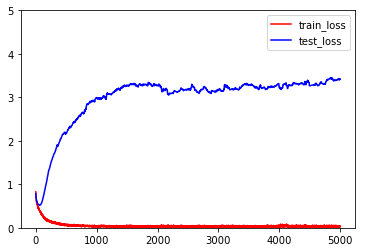

In [19]:
%matplotlib inline
plt.plot(range(n_epochs), history.history['loss'], color='red', label='train_loss')
plt.plot(range(n_epochs), history.history['val_loss'], color='blue', label='test_loss')
plt.ylim(0.0, 5.0)
plt.legend()

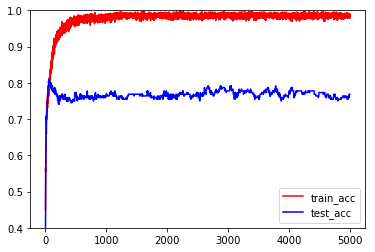

In [20]:
plt.plot(range(n_epochs), history.history['acc'], color='red', label='train_acc')
plt.plot(range(n_epochs), history.history['val_acc'], color='blue', label='test_acc')
plt.ylim(0.4, 1.0)
plt.legend()

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

print(model.evaluate(Xtrain, ytrain))
yhat = model.predict(Xtest) 
binarize = np.vectorize(lambda x: 1 if x >=0.5 else 0)
yhat = binarize(yhat)
print(classification_report(ytest, yhat))
print(confusion_matrix(ytest, yhat))

 32/864 [>.............................] - ETA: 0s[0.8546106992579539, 0.9421296296296297]
             precision    recall  f1-score   support

          0       0.86      0.76      0.81       210
          1       0.51      0.68      0.58        78

avg / total       0.77      0.74      0.75       288

[[159  51]
 [ 25  53]]


# Read in results.txt

lines = [line.strip() for line in open("./results.txt")]
D = {'block_weeks': [], 'open_weeks': [], 'score': [], 'gb__max_depth': [], 'gb__n_estimators': [], 
     'logreg__C': [], 'logreg__penalty': [], 'rf__max_depth': [], 'rf__n_estimators': []}

for i, line in enumerate(lines):
    print(line.strip())
    if i%4 == 3:
        print()
    if i%12 == 11:
        print()
    
    if i%4 == 0:        
        D['block_weeks'].append(int(line[16:18]))
        D['open_weeks'].append(int(line[23:25]))
        #print(line[16:18])
        #print(line[23:25])
    if i%4 == 1:        
        D['score'].append(float(line[7:]))
        #print(float(line[7:]))
    if i%4 == 3:        
        D['gb__max_depth'].append(int(parameters[0].split(': ')[1]))
        D['gb__n_estimators'].append(int(parameters[1].split(': ')[1]))
        D['logreg__C'].append(float(parameters[2].split(': ')[1]))
        D['logreg__penalty'].append(str(parameters[3].split(': ')[1]))
        D['rf__max_depth'].append(int(parameters[4].split(': ')[1]))
        D['rf__n_estimators'].append(int(parameters[5].split(': ')[1]))
        
        #parameters = line[1:-1].split(', ')
        #print(int(parameters[1].split(': ')[1]))
        

# Score and best parameters for each model

results = pd.DataFrame(D).transpose()
results.reindex(['block_weeks', 'open_weeks', 'score', 'logreg__C', 'logreg__penalty', 
                 'rf__max_depth', 'rf__n_estimators','gb__max_depth', 'gb__n_estimators'])

Block = 13

(0.857638888889 + 0.864583333333 + 0.861111111111)/3

Block = 26

(0.850694444444 + 0.871527777778 + 0.864583333333)/3

Block = 52

(0.868055555556 + 0.868055555556 + 0.854166666667)/3

# Rerun each model to print accuracy and classification report 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

block = ['13', '26', '52']
openw = ['26', '52', '78']
for b in block:
    accuracy = []
    for o in openw:
        train = './train_df_block'+b+'_open'+o+'.csv'
        test = './test_df_block'+b+'_open'+o+'.csv'
        print('block weeks: ', b, '\topen weeks: ', o)
        df_train = pd.read_csv(train)
        df_test = pd.read_csv(test)
        unwanted = ['id', 'name', 'first_review', 'last_review', 'permanently_closed']
        wanted = [i for i in df_train.columns if i not in unwanted]
        X_train = df_train[wanted]
        X_test = df_test[wanted]
        ytrain = df_train['permanently_closed']
        ytest = df_test['permanently_closed']
        imputer = Imputer(missing_values=np.nan, strategy='mean', axis=1)
        ss = StandardScaler() 
        pipe = make_pipeline(imputer, ss) 
        Xtrain = pipe.fit_transform(X_train)
        Xtest = pipe.transform(X_test)

        list_of_classifiers = [
            ('logreg', LogisticRegression(C=0.1, penalty='l1')),
            ('rf', RandomForestClassifier(max_depth=7, n_estimators=100)),
            ('gb', GradientBoostingClassifier(max_depth=5, n_estimators=500))
        ]
        vclf = VotingClassifier(list_of_classifiers, voting='soft')
        vclf.fit(Xtrain, ytrain)
        ypred = vclf.predict(Xtest)
        acc = accuracy_score(ytest, ypred)
        accuracy.append(acc)
        confusion = np.array(confusion_matrix(ytest, ypred))
        print('accuracy: ', acc)
        print('confusion matrix: ')
        print(confusion)
        print(classification_report(ytest, ypred))
    print('Mean accuracy for '+b+' weeks: ', sum(accuracy)/float(len(accuracy)))
    print()
    print()

# Around 30 closed restaurants are predicted to be open acroos all models:

count = 0
for p, t in zip(ypred, list(ytest)):
    if t == 1 and p == 0:
        count += 1
count